<a href="https://colab.research.google.com/github/kashyapHebbar/ArtificalIntelligencecodes/blob/main/nlp_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 TITLE PAGE**


## **1.1 Kashyap Hebbar**



## **1.2 KH01071**

## **1.3 [Team Number]**

# **2 GROUP DECLARATION**

# **3.Analyizing and visualizing the Data** 













We install several Python packages to handle various aspects of our project:

1. `datasets`: This package is used to load and process the dataset efficiently.
2. `transformers`: The Transformers library is used to load and fine-tune pre-trained language models for natural language understanding tasks.
3. `pandas`: The Pandas library is utilized for data manipulation and analysis.
4. `matplotlib`: This package is employed for creating visualizations and plots of the data.
5. `seaborn`: Seaborn is another visualization library that helps create more informative and attractive statistical graphics.
6. `nltk`: The Natural Language Toolkit (NLTK) is used for natural language processing tasks such as tokenization, stemming, and lemmatization.
7. `xgboost`: The XGBoost library is utilized for training gradient boosted decision trees, which are effective for a variety of machine learning tasks.
8. `networkx`: NetworkX is a package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
9. `plotly`: The Plotly library is employed for creating interactive and visually appealing plots.
10. `textblob`: TextBlob is a package used for processing textual data, providing tools for common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

These libraries are installed using the `!pip install` command in the notebook environment, ensuring that all the necessary dependencies are available for the project.


In [16]:
!pip install datasets 
!pip install transformers
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install xgboost
!pip install networkx
!pip install plotly
!pip install textblob

from huggingface_hub.lfs import List
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*In our report, we describe the process of defining various dictionaries and lists that are crucial for emotion classification. These elements facilitate the understanding and management of class names, enabling us to create an efficient and accurate model. The purpose of each dictionary and list is outlined below:*

>**CLASS_NAMES**: This dictionary provides a mapping between the original class names and their corresponding labels. It serves as a reference for understanding the initial emotion categories in the dataset.

> **CLASS_NAMES_MOD**: This dictionary connects the modified class names to their respective labels. By reducing the number of categories, we aim to simplify the classification task and improve the model's performance.

> **ACTUAL_CLASS_NAMES_MOD**: This dictionary maps the actual modified class names to their corresponding labels, which helps maintain consistency and clarity throughout the project.


> **merged_classes**: This dictionary establishes a connection between the merged class names and their labels. It is useful when combining related emotion categories into broader classes.


> **merged_list**: This list contains groups of original class names that are merged into new modified class names. It serves as a blueprint for the merging process.



> **PHRASES_ASSOCIATED_WITH_CLASSES**: This dictionary links class names to a collection of phrases that represent each emotion. This information is leveraged to augment the dataset and diversify the training examples.
By defining these dictionaries and lists, we create a structured foundation for our emotion classification model. This organization allows us to manage class names effectively and provides a clear path for expanding the dataset and improving the model's performance.



## **1.1 Data Expansion and Label Conversion for Emotion Classification**

In [17]:
CLASS_NAMES = {

    "0":"admiration",
    "1":"amusement",
    "2":"anger",
    "3":"annoyance",
    "4":"approval",
    "5":"caring",
    "6":"confusion",
    "7":"curiosity",
    "8":"desire",
    "9":"disappointment",
    "10":"disapproval",
    "11":"disgust",
    "12":"embarrassment",
    "13":"excitement",
    "14":"fear",
    "15":"gratitude",
    "16":"grief",
    "17":"joy",
    "18":"love",
    "19":"nervousness",
    "20":"optimism",
    "21":"pride",
    "22":"realization",
    "23":"relief",
    "24":"remorse",
    "25":"sadness",
    "26":"surprise",
    "27":"neutral",
}


CLASS_NAMES_MOD = {
    "0":"admiration_pride", # esteem
    "1":"amusement",
    "2":"approval_optimism_relief", # reassurance
    "3":"caring_gratitude", # empathy
    "4":"joy_love", # elation
    "5":"anger_annoyance", # frustration
    "6":"disappointment_disapproval", # dissatisfaction
    "7":"disgust_fear_grief", # apprehension
    "8":"embarrassment_nervousness_remorse_sadness", # sorrow
    "9":"confusion",
    "10":"curiosity",
    "11":"excitement_realization_surprise", # wonder
    "12":"desire",
    "13":"neutral"
}

ACTUAL_CLASS_NAMES_MOD = {
    "0":"esteem",
    "1":"amusement",
    "2":"reassurance",
    "3":"empathy",
    "4":"elation",
    "5":"frustration",
    "6":"dissatisfaction",
    "7":"apprehension",
    "8":"sorrow",
    "9":"confusion",
    "10":"curiosity",
    "11":"wonder",
    "12":"desire",
    "13":"neutral"
}

merged_classes = {
    "0": "esteem",
    "21": "esteem",
    "4": "reassurance",
    "20": "reassurance",
    "23": "reassurance",
    # "7": "inquisitiveness",
    # "8" : "inquisitiveness",
    "5": "empathy",
    "17": "elation",
    "2": "frustration",
    "9": "dissatisfaction",
    "11": "apprehension",
    "12": "sorrow",
    "13": "wonder",
    "15": "empathy",
    "18": "elation",
    "3": "frustration",
    "10": "dissatisfaction",
    "14": "apprehension",
    "16": "apprehension",
    "19": "sorrow",
    "24": "sorrow",
    "25": "sorrow",
    "22": "wonder",
    "26": "wonder",

}


merged_list = [
    [5,15], [17,18], [2,3], [9,10], [11,14,16], [12,19,24,25], [13,22,26],
    [0,21], [4,20,23] #[7,8]

]

PHRASES_ASSOCIATED_WITH_CLASSES = {
    "esteem": [
        "props respect",
        "mad admiration",
        "bigging up",
        "shout-out vibes",
        "kudos love",
    ],
    "amusement": [
        "LOL moments",
        "meme-worthy",
        "laugh riots",
        "good vibes",
        "ROFL zone",
    ],
    "reassurance": [
        "got your back",
        "all good vibes",
        "chillax mode",
        "keepin' it positive",
        "no worries",
    ],
    "empathy": [
        "feelin' you",
        "heart-to-heart",
        "I get you",
        "thanks fam",
        "solid support",
    ],
    "elation": [
        "good vibes only",
        "love fest",
        "happy dance",
        "party time",
        "sunshine smiles",
    ],
    "frustration": [
        "facepalm moments",
        "ugh feelings",
        "not cool, bro",
        "can't even",
        "major eye-roll",
    ],
    "dissatisfaction": [
        "meh vibes",
        "letdown city",
        "not impressed",
        "side-eye central",
        "not feeling it",
    ],
    "apprehension": [
        "freaked out",
        "feeling iffy",
        "not a fan",
        "low-key scared",
        "down in the dumps",
    ],
    "sorrow": [
        "in my feels",
        "got the blues",
        "awkies",
        "on-edge",
        "my bad vibes",
    ],
    "confusion": [
        "say what now?",
        "brain fog",
        "shook moments",
        "lost AF",
        "mind-boggled",
    ],
    "curiosity": [
        "whatcha thinking?",
        "spill the tea",
        "I gotta know",
        "tell more, bro",
        "whats up",
    ],
    "wonder": [
        "mind-blown",
        "whoa moments",
        "wild discoveries",
        "shooketh vibes",
        "jaw-dropping",
    ],
    "desire": [
        "craving it",
        "wishlist item",
        "gimme now",
        "teach me, bro",
        "must-have",
    ],
    "neutral": [
        "no drama",
        "just chillin'",
        "straight-up",
        "keeping it real",
        "no bias zone",
    ],
}
import random

def get_random_phrase(class_name):
    phrases = PHRASES_ASSOCIATED_WITH_CLASSES.get(class_name)
    return random.choice(phrases)

def convert_label(vals: List):
  res = []
  sorted_vals = sorted(vals)
  found = False


  if (len(vals) > 1):
    for data in merged_list:
      if data == sorted_vals:
        res.append(merged_classes[str(sorted_vals[0])])
        found = True
        break
  
  if not found:
    for val in vals:
      if str(val) in merged_classes:
        res.append(merged_classes[str(val)])
      else:
        res.append(CLASS_NAMES[str(val)])
  return res
# Define a function to expand the data
def expand_data(df):
  expanded_data = []
  for index, row in df.iterrows():
    if len(row['labels']) > 1:
      for label in row['labels']:
          value = get_random_phrase(label)
          expanded_data.append({'text': "{} {}".format(row['text'], value), 'labels': label})
    else:
       for label in row['labels']:
          expanded_data.append({'text': row['text'], 'labels': label})

  expanded_df = pd.DataFrame(expanded_data)
  print(expanded_df['labels'].value_counts(normalize=True))
  return expanded_df

In [18]:
from datasets import list_datasets
datasets_list = list_datasets()
len(datasets_list)

30885

## **1.2 Analyzing Go-Emotions Training Dataset** 








1. Load the Go Emotions dataset and convert it to a pandas DataFrame.
2. Display the first 20 rows of the dataset to get an overview of the data.
3. Apply the `convert_label` function to the 'labels' column to simplify the multi-label classification problem.
4. Remove the 'id' column, as it is not needed for model training.
5. Display the first 20 rows of the modified DataFrame to visually inspect the processed labels.
6. Ensure the labels are correctly transformed for our emotion recognition task, confirming that our data preprocessing steps are correctly implemented before proceeding with model training.

In [22]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='train')
df_train = dataset.data.to_pandas() 
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_train.head(20)


text   labels       id
0   My favourite food is anything I didn't have to...     [27]  eebbqej
1   Now if he does off himself, everyone will thin...     [27]  ed00q6i
2                      WHY THE FUCK IS BAYLESS ISOING      [2]  eezlygj
3                         To make her feel threatened     [14]  ed7ypvh
4                              Dirty Southern Wankers      [3]  ed0bdzj
5   OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...     [26]  edvnz26
6   Yes I heard abt the f bombs! That has to be wh...     [15]  ee3b6wu
7   We need more boards and to create a bit more s...  [8, 20]  ef4qmod
8   Damn youtube and outrage drama is super lucrat...      [0]  ed8wbdn
9   It might be linked to the trust factor of your...     [27]  eczgv1o
10  Demographics? I don’t know anybody under 35 wh...      [6]  eel6g5h
11  Aww... she'll probably come around eventually,...   [1, 4]  edex4ki
12  Hello everyone. Im from Toronto as well. Can c...     [27]  ef83m1s
13  R/sleeptrain Might be time for some sleep trai...      [5]  efh7xnk
14  [NAME] - same fucking problem, slightly better...      [3]  efdqav7
15  Shit, I guess I accidentally bought a Pay-Per-...  [3, 12]  edivtm3
16                                   Thank you friend     [15]  eeqd04y
17                                    Fucking coward.      [2]  edk0z9k
18                that is what retardation looks like     [27]  eeb9aft
19  Maybe that’s what happened to the great white ...  [6, 22]  eczq8zg

In [23]:
df_train['labels'] = df_train['labels'].apply(convert_label)
df_train = df_train.drop('id', axis=1)
df_train.head(20) # checking labels of training set 

text  \
0   My favourite food is anything I didn't have to...   
1   Now if he does off himself, everyone will thin...   
2                      WHY THE FUCK IS BAYLESS ISOING   
3                         To make her feel threatened   
4                              Dirty Southern Wankers   
5   OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...   
6   Yes I heard abt the f bombs! That has to be wh...   
7   We need more boards and to create a bit more s...   
8   Damn youtube and outrage drama is super lucrat...   
9   It might be linked to the trust factor of your...   
10  Demographics? I don’t know anybody under 35 wh...   
11  Aww... she'll probably come around eventually,...   
12  Hello everyone. Im from Toronto as well. Can c...   
13  R/sleeptrain Might be time for some sleep trai...   
14  [NAME] - same fucking problem, slightly better...   
15  Shit, I guess I accidentally bought a Pay-Per-...   
16                                   Thank you friend   
17                                    Fucking coward.   
18                that is what retardation looks like   
19  Maybe that’s what happened to the great white ...   

                      labels  
0                  [neutral]  
1                  [neutral]  
2              [frustration]  
3             [apprehension]  
4              [frustration]  
5                   [wonder]  
6                  [empathy]  
7      [desire, reassurance]  
8                   [esteem]  
9                  [neutral]  
10               [confusion]  
11  [amusement, reassurance]  
12                 [neutral]  
13                 [empathy]  
14             [frustration]  
15     [frustration, sorrow]  
16                 [empathy]  
17             [frustration]  
18                 [neutral]  
19       [confusion, wonder]

1. Load the Go Emotions dataset's test split and convert it to a pandas DataFrame.
2. Display the first 20 rows of the test dataset to get an overview of the data.
3. Apply the `convert_label` function to the 'labels' column to simplify the multi-label classification problem in the test dataset.
4. Remove the 'id' column from the test dataset, as it is not needed for model evaluation.
5. Display the first 20 rows of the modified test DataFrame to visually inspect the processed labels.
6. Ensure the test dataset's labels are correctly transformed, similarly to the training dataset, so that the test dataset can be used for model evaluation.

## **1.3 Analyzing the Go-Emotions Test Dataset**

In [24]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='test')
df_test = dataset.data.to_pandas()
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_test.head(20)

text    labels       id
0   I’m really sorry about your situation :( Altho...      [25]  eecwqtt
1     It's wonderful because it's awful. At not with.       [0]  ed5f85d
2   Kings fan here, good luck to you guys! Will be...      [13]  een27c3
3   I didn't know that, thank you for teaching me ...      [15]  eelgwd1
4   They got bored from haunting earth for thousan...      [27]  eem5uti
5   Thank you for asking questions and recognizing...      [15]  ef2nq7i
6                                      You’re welcome      [15]  efdbh17
7                     100%! Congrats on your job too!      [15]  ef0ec3b
8   I’m sorry to hear that friend :(. It’s for the...      [24]  ee8utmi
9    Girlfriend weak as well, that jump was pathetic.      [25]  eeni74k
10  [NAME] has towed the line of the Dark Side. He...   [3, 10]  eeaf7fg
11          Lol! But I love your last name though. XD   [1, 18]  ee3yyz3
12          Translation }}} I wish I could afford it.       [8]  eegij2q
13  It's great that you're a recovering addict, th...    [0, 7]  eeccgbb
14  I've also heard that intriguing but also kinda...      [14]  edk4e66
15  I never wanted to punch osap harder after seei...      [10]  eemuu4u
16  The thought of shooting anything at asylum see...      [14]  ed2e00i
17  if the pain doesn't go away after 4 hours or s...  [25, 27]  eezp1cd
18  Triggered:: Welp guess it's time for me to re-...       [1]  eearbor
19  I'm autistic and I'd appreciate if you remove ...      [15]  ee5usgu

In [25]:
df_test['labels'] = df_test['labels'].apply(convert_label)
df_test = df_test.drop('id', axis=1)
df_test.head(20) 

text  \
0   I’m really sorry about your situation :( Altho...   
1     It's wonderful because it's awful. At not with.   
2   Kings fan here, good luck to you guys! Will be...   
3   I didn't know that, thank you for teaching me ...   
4   They got bored from haunting earth for thousan...   
5   Thank you for asking questions and recognizing...   
6                                      You’re welcome   
7                     100%! Congrats on your job too!   
8   I’m sorry to hear that friend :(. It’s for the...   
9    Girlfriend weak as well, that jump was pathetic.   
10  [NAME] has towed the line of the Dark Side. He...   
11          Lol! But I love your last name though. XD   
12          Translation }}} I wish I could afford it.   
13  It's great that you're a recovering addict, th...   
14  I've also heard that intriguing but also kinda...   
15  I never wanted to punch osap harder after seei...   
16  The thought of shooting anything at asylum see...   
17  if the pain doesn't go away after 4 hours or s...   
18  Triggered:: Welp guess it's time for me to re-...   
19  I'm autistic and I'd appreciate if you remove ...   

                            labels  
0                         [sorrow]  
1                         [esteem]  
2                         [wonder]  
3                        [empathy]  
4                        [neutral]  
5                        [empathy]  
6                        [empathy]  
7                        [empathy]  
8                         [sorrow]  
9                         [sorrow]  
10  [frustration, dissatisfaction]  
11            [amusement, elation]  
12                        [desire]  
13             [esteem, curiosity]  
14                  [apprehension]  
15               [dissatisfaction]  
16                  [apprehension]  
17               [sorrow, neutral]  
18                     [amusement]  
19                       [empathy]

1. Load the Go Emotions dataset's validation split and convert it to a pandas DataFrame.
2. Display the first 20 rows of the validation dataset to get an overview of the data.
3. Apply the `convert_label` function to the 'labels' column to simplify the multi-label classification problem in the validation dataset.
4. Remove the 'id' column from the validation dataset, as it is not needed for model evaluation.
5. Display the first 20 rows of the modified validation DataFrame to visually inspect the processed labels.
6. Ensure the validation dataset's labels are correctly transformed, similarly to the training and test datasets, so that the validation dataset can be used for model evaluation and hyperparameter tuning.

## **1.4 Validating the Go-Emotions Dataset**

In [26]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='validation')
df_validation = dataset.data.to_pandas()
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_validation.head(20)

text      labels       id
0   Is this in New Orleans?? I really feel like th...        [27]  edgurhb
1   You know the answer man, you are programmed to...     [4, 27]  ee84bjg
2                I've never been this sad in my life!        [25]  edcu99z
3   The economy is heavily controlled and subsidiz...     [4, 27]  edc32e2
4   He could have easily taken a real camera from ...        [20]  eepig6r
5   Thank you for your vote of confidence, but we ...        [15]  eczm50f
6   Wah Mum other people call me on my bullshit an...         [2]  ed4yr9r
7                                        There it is!        [27]  ede4v0m
8   At least now [NAME] has more time to gain his ...        [20]  eekez9p
9   Good. We don't want more thrash liberal offspr...        [10]  ee0fxpu
10  It's better to say a moment like that could tr...        [18]  eelgxk0
11  I went to a destination wedding being the only...    [12, 22]  eczyj0h
12                He died 4 days later of dehydration        [16]  edwloev
13  Like this just cuz of the [NAME] rhymes backgr...        [27]  eebwc0c
14  Lol dream on buddy. You’ve had enough attentio...  [1, 3, 25]  ed2znun
15  As an anesthesia resident this made me blow ai...      [2, 3]  ee2piwu
16  1-2-3-4 I declare a thumb war! Dangit [NAME], ...        [25]  edgygzk
17  Did you hear the reason for this? Because they...        [27]  ed8a2zl
18                 [NAME] is such a legendary daddy 😩        [27]  eewv8u8
19  I don't necessarily hate them, but then again,...     [3, 10]  ed4m2jt

In [27]:
df_validation['labels'] = df_validation['labels'].apply(convert_label)
df_validation = df_validation.drop('id', axis=1)
df_validation.head(20) 

text  \
0   Is this in New Orleans?? I really feel like th...   
1   You know the answer man, you are programmed to...   
2                I've never been this sad in my life!   
3   The economy is heavily controlled and subsidiz...   
4   He could have easily taken a real camera from ...   
5   Thank you for your vote of confidence, but we ...   
6   Wah Mum other people call me on my bullshit an...   
7                                        There it is!   
8   At least now [NAME] has more time to gain his ...   
9   Good. We don't want more thrash liberal offspr...   
10  It's better to say a moment like that could tr...   
11  I went to a destination wedding being the only...   
12                He died 4 days later of dehydration   
13  Like this just cuz of the [NAME] rhymes backgr...   
14  Lol dream on buddy. You’ve had enough attentio...   
15  As an anesthesia resident this made me blow ai...   
16  1-2-3-4 I declare a thumb war! Dangit [NAME], ...   
17  Did you hear the reason for this? Because they...   
18                 [NAME] is such a legendary daddy 😩   
19  I don't necessarily hate them, but then again,...   

                              labels  
0                          [neutral]  
1             [reassurance, neutral]  
2                           [sorrow]  
3             [reassurance, neutral]  
4                      [reassurance]  
5                          [empathy]  
6                      [frustration]  
7                          [neutral]  
8                      [reassurance]  
9                  [dissatisfaction]  
10                         [elation]  
11                  [sorrow, wonder]  
12                    [apprehension]  
13                         [neutral]  
14  [amusement, frustration, sorrow]  
15                     [frustration]  
16                          [sorrow]  
17                         [neutral]  
18                         [neutral]  
19    [frustration, dissatisfaction]

In [28]:
df_train = expand_data(df_train)
df_test = expand_data(df_test)
df_validation = expand_data(df_validation)


neutral            0.280205
reassurance        0.092088
esteem             0.083181
frustration        0.075022
empathy            0.073643
elation            0.068677
dissatisfaction    0.064085
wonder             0.059494
sorrow             0.046074
amusement          0.045876
curiosity          0.043177
apprehension       0.028890
confusion          0.026958
desire             0.012632
Name: labels, dtype: float64
neutral            0.284373
reassurance        0.087206
esteem             0.081795
frustration        0.078294
empathy            0.076862
dissatisfaction    0.066200
elation            0.062381
wonder             0.061903
curiosity          0.045194
sorrow             0.043285
amusement          0.042011
apprehension       0.032941
confusion          0.024348
desire             0.013208
Name: labels, dtype: float64
neutral            0.279254
reassurance        0.098672
empathy            0.080645
esteem             0.079538
frustration        0.071474
dissatisfaction   

## **1.5 Co-Occurance** 

In this code snippet, the following observations can be made:

1. A co-occurrence matrix is created for each emotion class using a sliding window of size 2, capturing the frequency of word pairs appearing together in the text.
2. The 10 most common words are used as the vocabulary for each class to understand the relationships between frequently occurring words.
3. The co-occurrence matrices are visualized as heatmaps, where the color intensity represents the frequency of word pairs appearing together. Darker colors indicate higher frequency of co-occurrence, while lighter colors represent lower frequency.
4. The heatmaps reveal patterns of word co-occurrence specific to each emotion class. This helps to understand the relationships between words and how they are used in the context of different emotions.
5. By examining the heatmaps, it is possible to identify word pairs that are unique to certain emotion classes or shared across multiple classes. This can provide insights into the linguistic characteristics of each emotion and may help improve the classification model by revealing potential features for differentiation.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


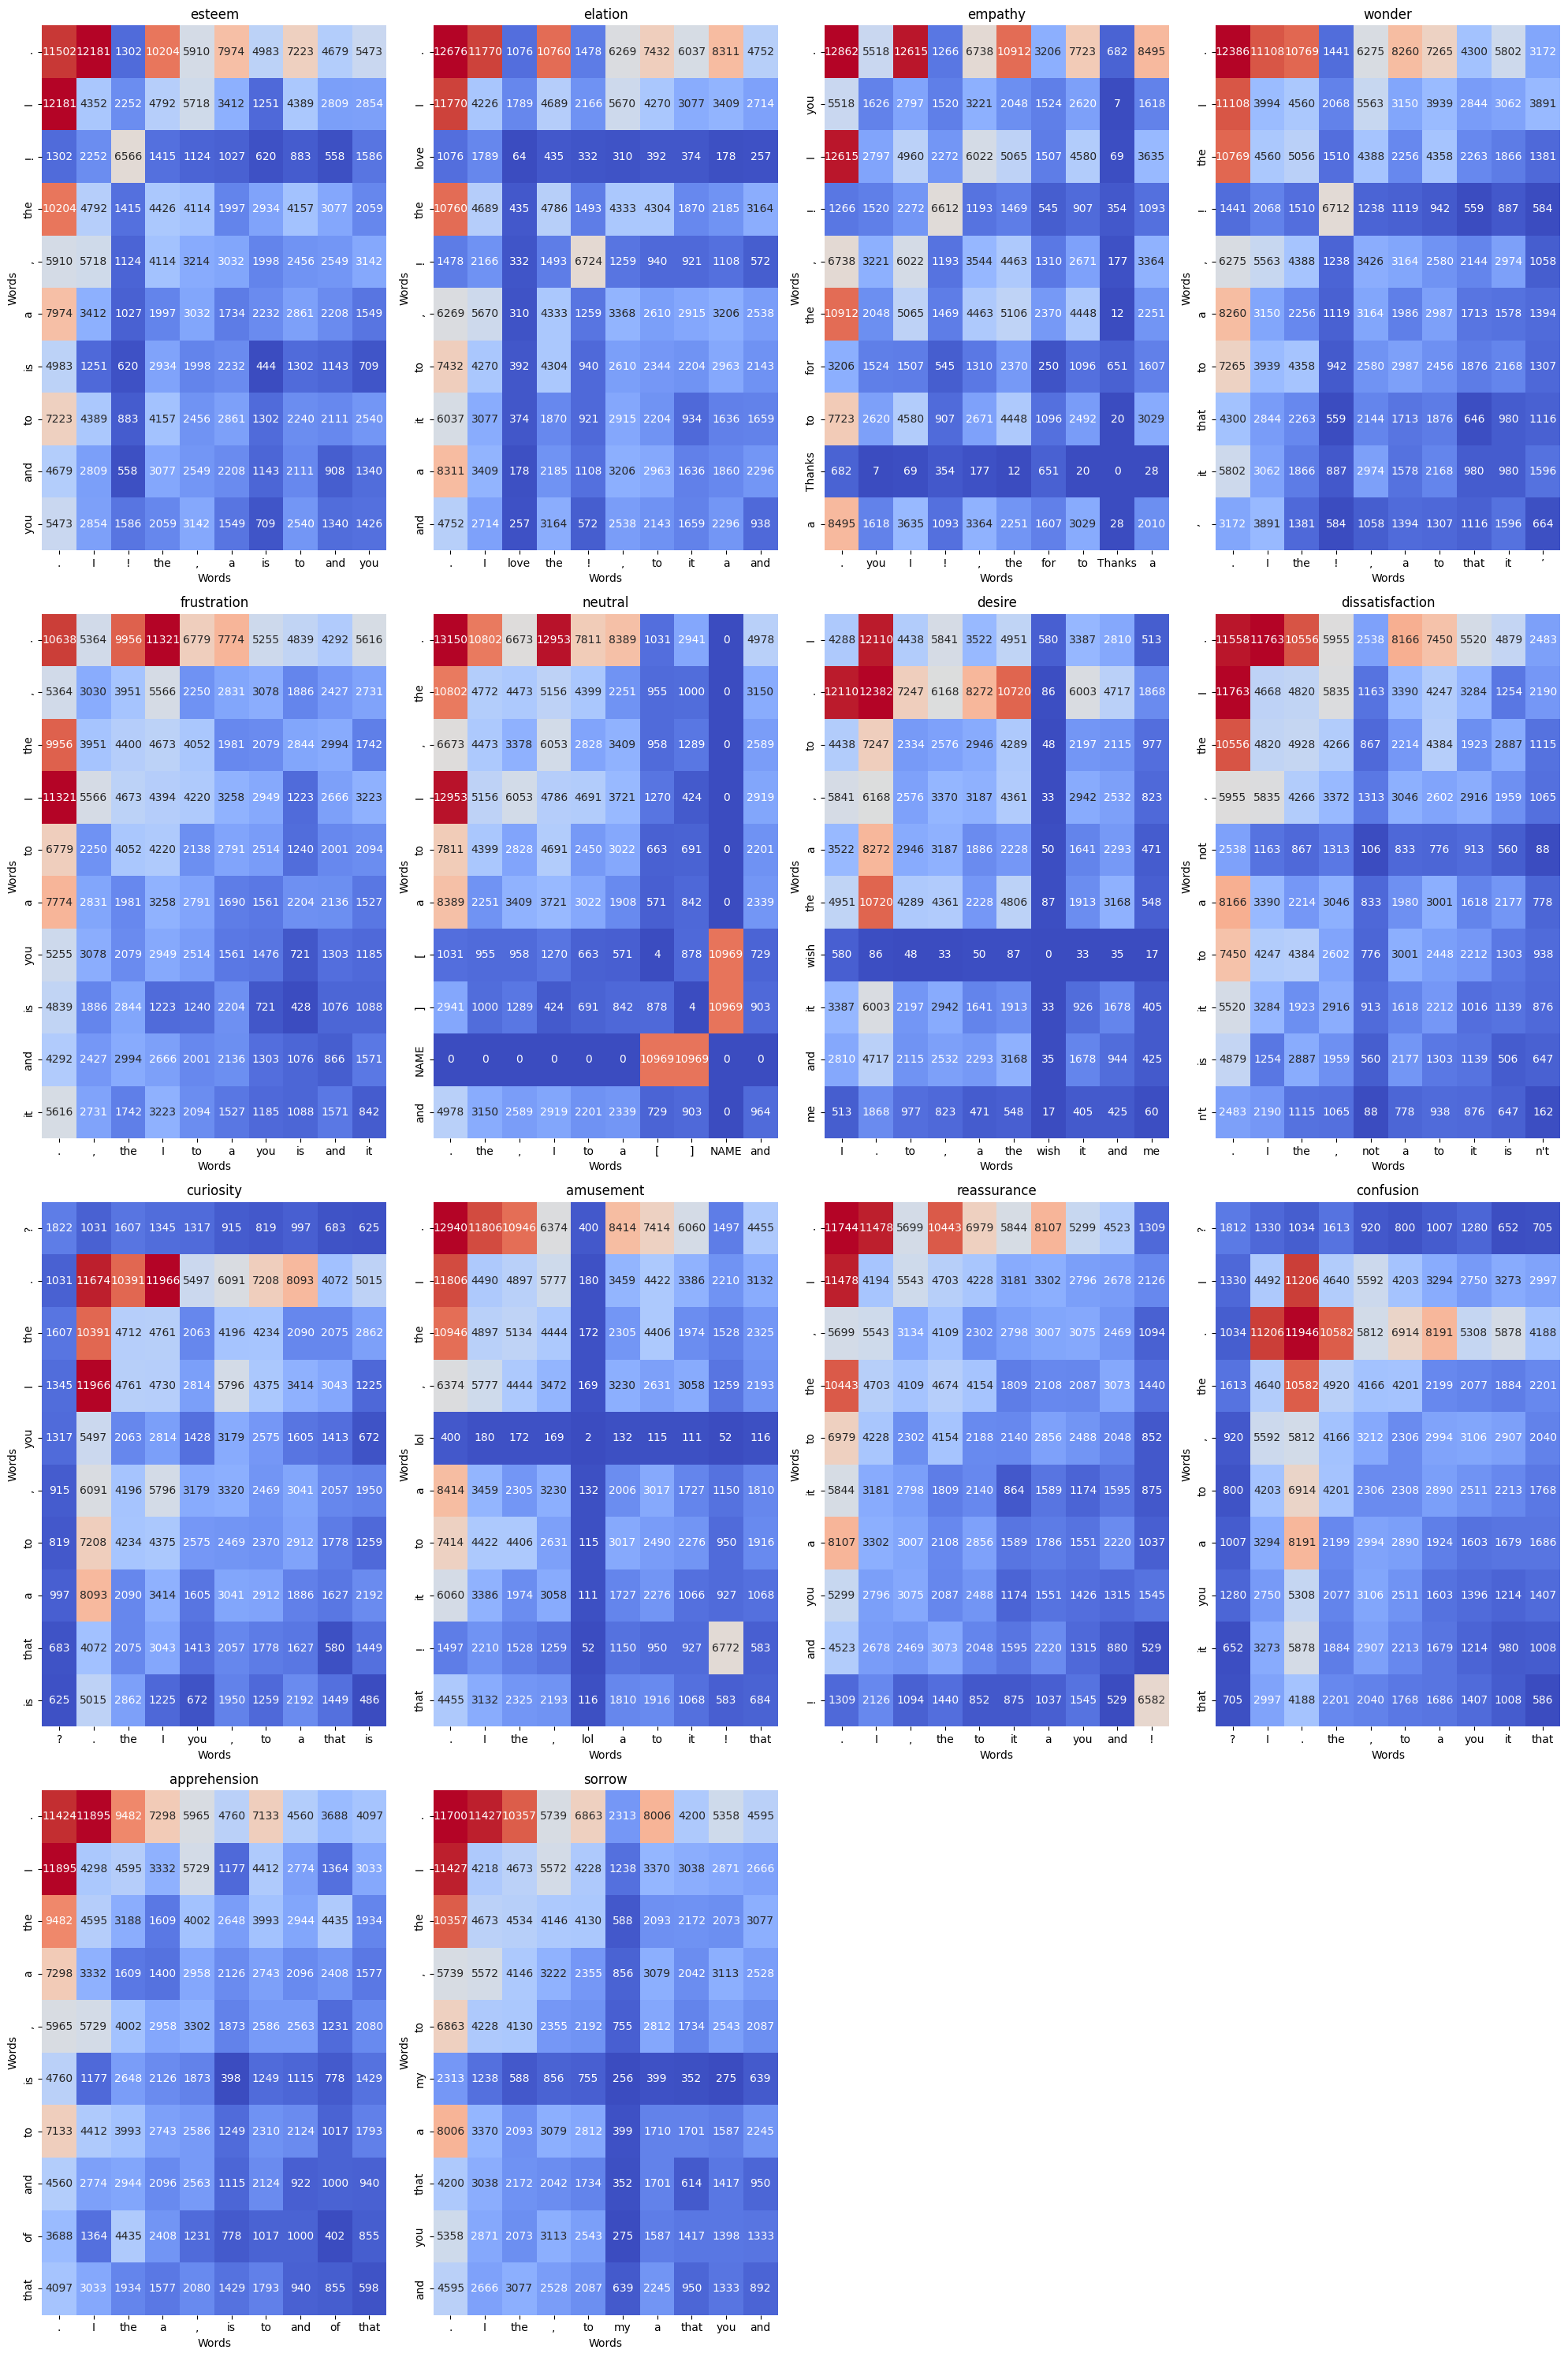

In [ ]:
import numpy as np
import itertools
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
def create_co_occurrence_matrix(texts, vocab, window_size=2):
    vocab_size = len(vocab)
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

    for text in texts:
        tokens = nltk.word_tokenize(text)
        token_indices = [vocab.index(token) for token in tokens if token in vocab]

        for i in range(len(token_indices) - window_size + 1):
            pairs = itertools.combinations(token_indices[i:i + window_size], 2)
            for pair in pairs:
                co_occurrence_matrix[pair] += 1
                co_occurrence_matrix[pair[::-1]] += 1

    return co_occurrence_matrix

# Combine all texts from train, test, and validation sets
all_texts = pd.concat([df_train, df_test, df_validation], ignore_index=True)

# Using the 10 most common words in each class
n_most_common = 10
classwise_vocab = {}

for class_name in set(df_train['labels']):
    class_texts = all_texts[all_texts['labels'] == class_name]['text']
    fdist = nltk.FreqDist(nltk.word_tokenize(' '.join(class_texts)))
    classwise_vocab[class_name] = [word for word, _ in fdist.most_common(n_most_common)]

num_classes = len(set(df_train['labels']))
num_columns = 4
num_rows = (num_classes + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 30))

for i, class_name in enumerate(set(df_train['labels'])):
    vocab = classwise_vocab[class_name]
    co_occurrence_matrix = create_co_occurrence_matrix(all_texts['text'], vocab, window_size=2)
    sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.0f', cbar=False, xticklabels=vocab, yticklabels=vocab, ax=axes[i // num_columns, i % num_columns])
    axes[i // num_columns, i % num_columns].set_title(class_name)
    axes[i // num_columns, i % num_columns].set_xlabel('Words')
    axes[i // num_columns, i % num_columns].set_ylabel('Words')

# Remove empty subplots if necessary
for i in range(num_classes, num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

plt.tight_layout()
plt.show()


## **1.6 Text Length Distribution**

In this code snippet, the following observations can be made:

1. The text length of each sample in the training dataset is calculated by counting the number of words in the text.
2. A histogram is created to visualize the distribution of text lengths across the dataset.
3. The histogram is plotted with 30 bins, providing a detailed view of the distribution of text lengths.
4. The x-axis represents the text length in words, while the y-axis represents the frequency of samples with a specific text length.
5. The histogram helps to understand the overall distribution of text lengths in the training dataset, which can provide insights into the characteristics of the data and may have implications on the choice of preprocessing techniques or model architecture.

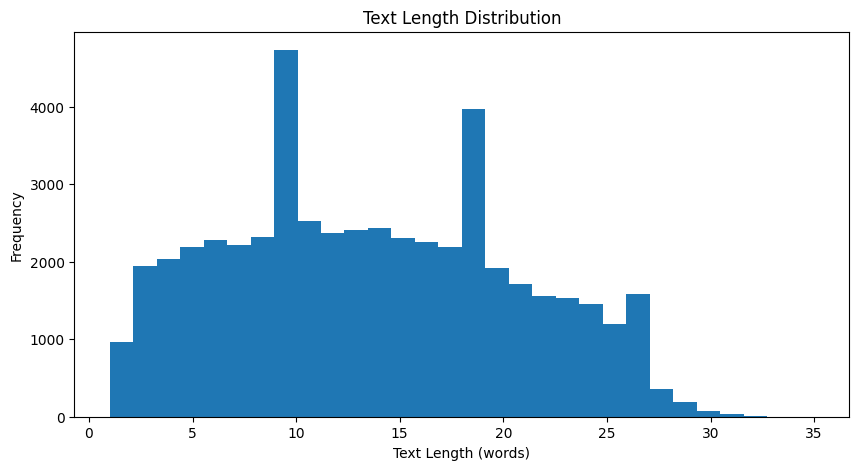

In [ ]:
text_lengths = df_train['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=30)
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


## **1.7 Co-Relation Between Emotion Dataset**

In the resulting heatmap generated by the provided code, the following observations can be made:

1. The heatmap visualizes the correlation between different pairs of emotion labels, which helps identify any relationships or patterns among the emotions.
2. The color intensity in the heatmap represents the strength of the correlation between emotion pairs, with stronger correlations having a more intense color.
3. By examining the heatmap, we can identify the emotion pairs that frequently co-occur and those that rarely or never appear together. This information can provide insights into the underlying structure of the emotions in the dataset and may help improve the understanding of the emotional context within the text samples.

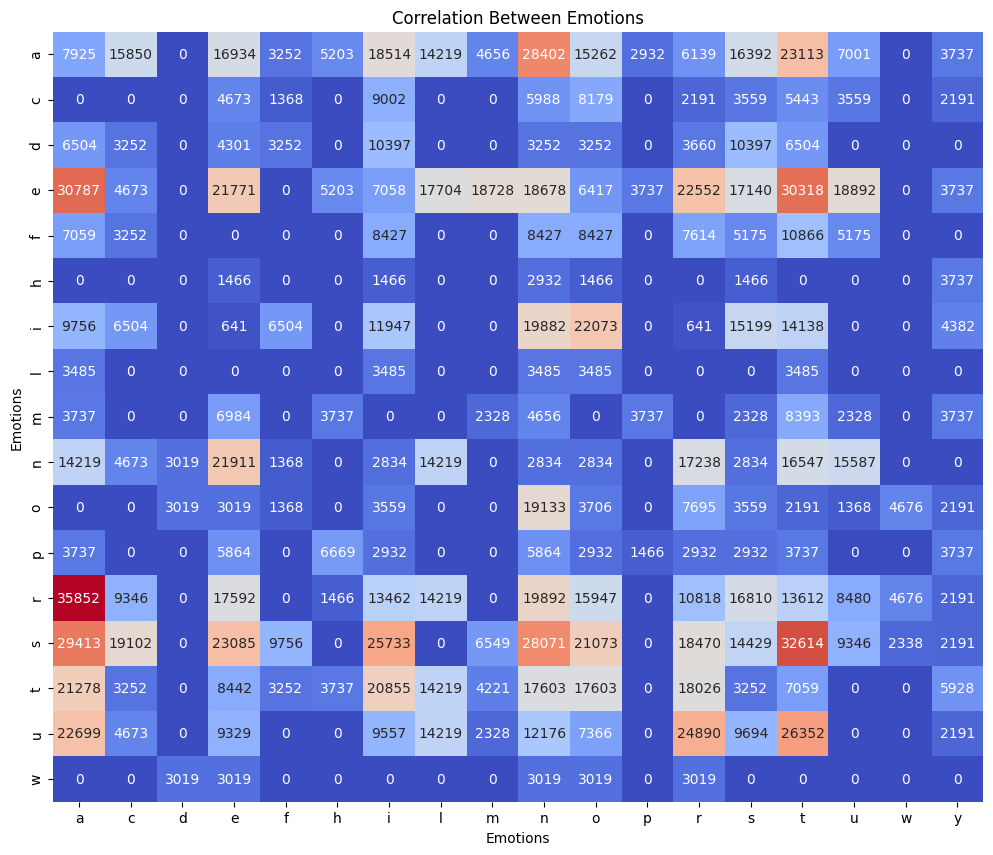

Label2      a      c     d      e     f     h      i      l      m      n  \
Label1                                                                      
a        7925  15850     0  16934  3252  5203  18514  14219   4656  28402   
c           0      0     0   4673  1368     0   9002      0      0   5988   
d        6504   3252     0   4301  3252     0  10397      0      0   3252   
e       30787   4673     0  21771     0  5203   7058  17704  18728  18678   
f        7059   3252     0      0     0     0   8427      0      0   8427   
h           0      0     0   1466     0     0   1466      0      0   2932   
i        9756   6504     0    641  6504     0  11947      0      0  19882   
l        3485      0     0      0     0     0   3485      0      0   3485   
m        3737      0     0   6984     0  3737      0      0   2328   4656   
n       14219   4673  3019  21911  1368     0   2834  14219      0   2834   
o           0      0  3019   3019  1368     0   3559      0      0  19133   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_label_correlations(df):
    label_pairs = []

    for index, row in df.iterrows():
        emotion_label = row['labels']
        label_pairs.extend([(emotion_label[i], emotion_label[j]) for i in range(len(emotion_label)) for j in range(i+1, len(emotion_label))])

    label_pairs_df = pd.DataFrame(label_pairs, columns=['Label1', 'Label2'])
    label_correlations = pd.crosstab(label_pairs_df['Label1'], label_pairs_df['Label2'])

    return label_correlations

label_correlations = calculate_label_correlations(df_train)

plt.figure(figsize=(12, 10))
sns.heatmap(label_correlations, annot=True, cmap='coolwarm', fmt='.0f', cbar=False)
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.title('Correlation Between Emotions')
plt.show()
print(label_correlations)


## **1.8 Word Freequency**

Based on the bar graph generated by the given code, we can make the following observations:

1. The graph displays the top 20 most frequent words in the text samples after excluding stopwords.
2. The x-axis represents the words, while the y-axis represents their corresponding frequencies in the dataset.
3. The visualization helps identify the most common words and themes within the dataset, which can provide insights into the predominant topics and emotions present in the text samples.
4. By examining the most frequent words, we can better understand the content and context of the dataset, which can potentially help improve the performance of emotion recognition models.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


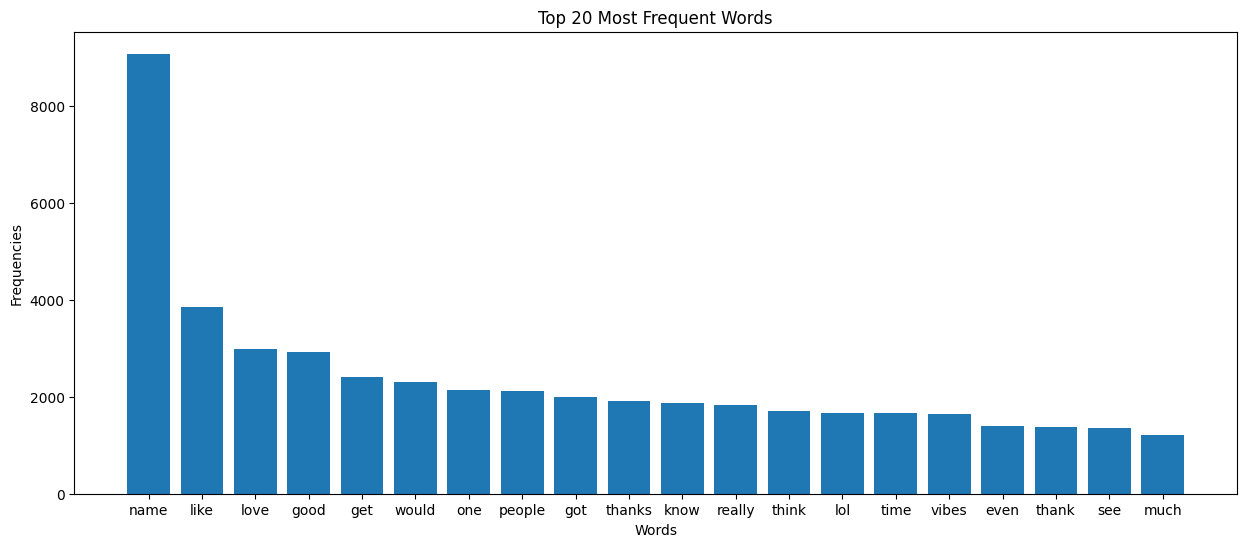

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


texts = df_train['text']

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for text in texts for word in word_tokenize(text) if word.isalpha()]
filtered_tokens = [word for word in tokens if word not in stop_words]

# Calculate word frequencies
word_freq = Counter(filtered_tokens)

# Most common words
num_words = 20
common_words = word_freq.most_common(num_words)

# Prepare data for the bar graph
words, frequencies = zip(*common_words)

# Plot the bar graph
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title(f'Top {num_words} Most Frequent Words')
plt.show()


## **1.9 Sentiment Analysis**

Based on the histogram created by the given code, we can make the following observations:

1. The graph shows the distribution of sentiment polarity scores for the text samples in the dataset.
2. The x-axis represents sentiment polarity, ranging from -1 (most negative) to 1 (most positive), while the y-axis represents the frequency of text samples with corresponding sentiment scores.
3. The visualization provides insights into the overall sentiment distribution within the dataset, which can help in understanding the nature and balance of emotions present in the text samples.
4. By examining the sentiment polarity distribution, we can identify whether the dataset is biased towards any particular sentiment, which might impact the performance of emotion recognition models. The distribution can also inform us if any pre-processing or balancing techniques are required to improve model performance.

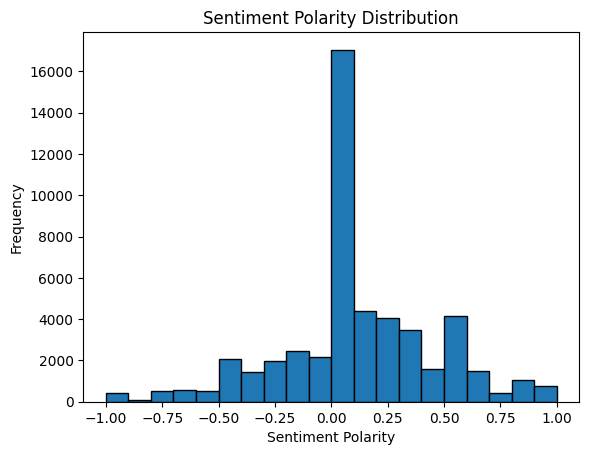

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Calculate the sentiment polarity for each text
df_train['sentiment'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot a histogram of sentiment scores
plt.hist(df_train['sentiment'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()


# **2.Visualizing Label Distribution in the GoEmotions Dataset**

## **2.1 Pie-Chart**



1. The chart displays the distribution of emotion labels in the dataset, which helps us understand the proportion of each emotion present in the data.
2. The most common emotion label in the dataset is "reassurance" at 12.8%, followed by "frustration" at 10.4% and "empathy" at 10.2%.
3. The least common emotion label is "desire" at 1.75%, indicating that there are significantly fewer samples for this emotion compared to others.
4. Some emotions like "neutral", "curiosity", "amusement", "sorrow", "wonder", "dissatisfaction", "esteem", and "elation" have relatively similar distribution percentages, ranging from 6% to 9.54%.
5. The distribution of emotion labels in the dataset may affect the performance of an emotion recognition model, as imbalanced data can cause biased predictions. In this case, it might be helpful to apply some techniques to balance the dataset, such as oversampling the underrepresented classes or undersampling the overrepresented ones.
6. The exploded 'neutral' slice in the chart allows for easier identification of its proportion compared to other emotions.

In [ ]:

import plotly.graph_objects as go
# Calculate label frequencies
label_counts = df_train['labels'].explode().value_counts()
# Set up chart data
labels = label_counts.index
sizes = label_counts.values
# Create a pie chart
fig = go.Figure(go.Pie(
    labels=labels,
    values=sizes,
    hole=0.4,  # Creates a donut chart
    title="Label Distribution in the Dataset",
    textinfo="percent+label",
    insidetextorientation="radial",
    pull=[0.1 if label == "neutral" else 0 for label in labels],  # Explode the 'neutral' slice
    marker=dict(line=dict(color='#FFFFFF', width=1)),
))

# Customize chart appearance
fig.update_layout(
    title=dict(x=0.5),  # Center the title
    font=dict(size=12),
    legend=dict(orientation="h", yanchor="top", y=-0.3, xanchor="center", x=0.5),
)

# Display the chart
fig.show()


## **2.2 Bar Graph**

In this bar graph, we have visualized the frequency of various emotion classes in the dataset. The emotion classes and their respective frequencies are as follows:

1. Neutral: The most frequent emotion class with approximately 14,000 occurrences.
2. Reassurance: This emotion class has a frequency of between 4,000 and 6,000, making it the second most common emotion in the dataset.
3. Esteem: Slightly less frequent than reassurance, it still has more than 4,000 occurrences.
4. Frustration: This emotion class is observed around 4,000 times in the dataset.
5. Empathy: With a frequency similar to frustration, it is another commonly occurring emotion.
6. Elation: This emotion class has a lower frequency compared to empathy.
7. Dissatisfaction: Occurring less frequently than elation.
8. Wonder: This emotion class is less frequent than dissatisfaction.
9. Sorrow: With a frequency similar to amusement, it is observed less frequently than wonder.
10. Amusement: This emotion class occurs at a similar frequency to sorrow.
11. Curiosity: With a frequency lower than amusement.
12. Apprehension: This emotion class occurs less frequently than curiosity.
13. Confusion: Slightly less common than apprehension.
14. Desire: The least frequently observed emotion class in the dataset.

In conclusion, the bar graph effectively displays the varying frequency of different emotion classes in the dataset, with 'Neutral' being the most common and 'Desire' being the least common. This information can be useful for understanding the distribution of emotions in the dataset and informing further analysis or modeling tasks.

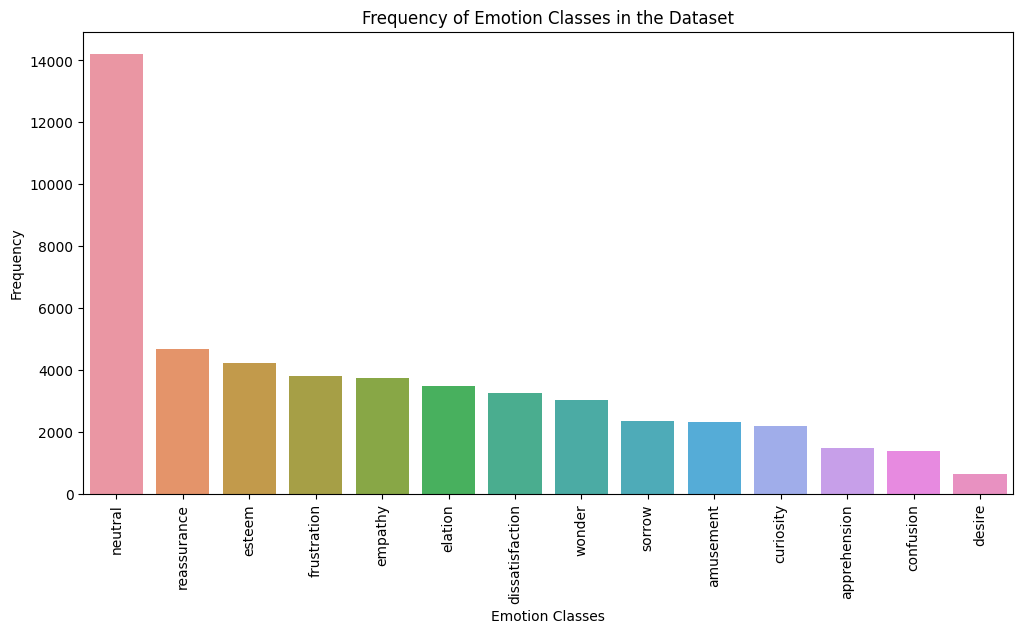

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each emotion class
emotion_counts = df_train['labels'].explode().value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xlabel("Emotion Classes")
plt.ylabel("Frequency")
plt.title("Frequency of Emotion Classes in the Dataset")
plt.xticks(rotation=90)
plt.show()


## **2.3 Stacked Bar Chart**


In the presented stacked bar chart, we have effectively illustrated the proportional distribution of various emotion classes found within the dataset. By opting to display proportions rather than raw frequencies, we enable a more straightforward comparison of the relative prevalence of each emotion class. The single stacked bar represents the complete dataset, with each segment corresponding to a specific emotion class, offering a comprehensive snapshot of the dataset's emotional landscape.

The chart is designed with several essential features, including:

1. Hiding the x-axis, as the focus is on a single bar that encapsulates the entire dataset.
2. Labeling the y-axis as "Proportion," emphasizing the relative prevalence of the emotion classes.
3. A clear and informative chart title, "Label Distribution in the Dataset (Stacked Bar Chart)," which succinctly conveys the chart's purpose.
4. A legend positioned to the right of the chart, offering a direct correlation between the segment colors and their respective emotion classes.

In conclusion, the stacked bar chart serves as an effective visual representation of the proportional distribution of emotion classes in the dataset. This clear and concise presentation of the data provides valuable insights into the relative prevalence of each emotion, making it a useful tool for informing further analysis, modeling tasks, and decision-making processes related to the dataset.

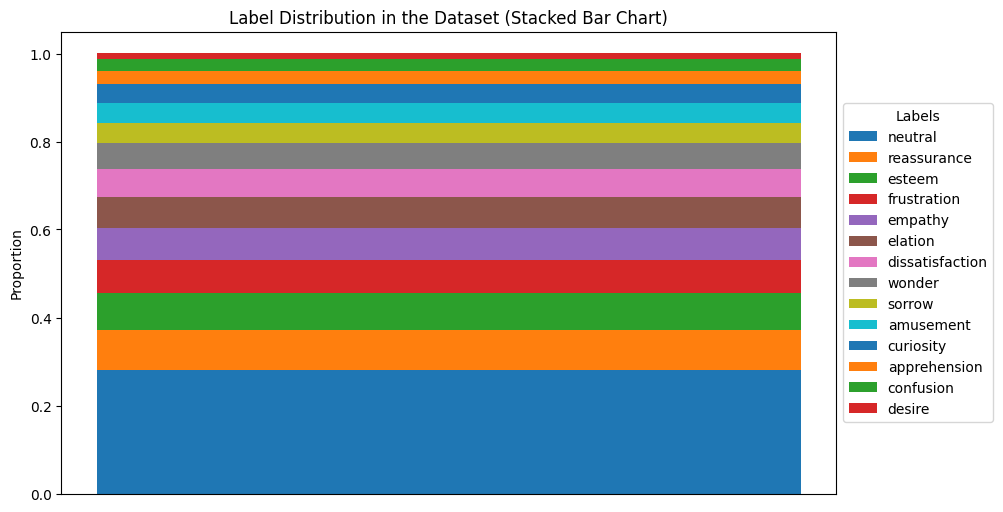

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate label frequencies
label_counts = df_train['labels'].explode().value_counts()

# Set up chart data
labels = label_counts.index
sizes = label_counts.values

# Create a dataframe with the label proportions
df_label_proportions = pd.DataFrame(sizes, index=labels, columns=['proportion'])
df_label_proportions['proportion'] = df_label_proportions['proportion'] / df_label_proportions['proportion'].sum()

# Create a cumulative sum of the proportions
df_label_proportions['cumulative_proportion'] = df_label_proportions['proportion'].cumsum()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Stacked Bar Chart
for i, (label, row) in enumerate(df_label_proportions.iterrows()):
    if i == 0:
        ax.bar(0, row['proportion'], label=label)
        last_proportion = row['proportion']
    else:
        ax.bar(0, row['proportion'], bottom=last_proportion, label=label)
        last_proportion += row['proportion']

# Customize chart appearance
ax.set_xticks([])  # Hide the x-axis
ax.set_ylabel("Proportion")
ax.set_title("Label Distribution in the Dataset (Stacked Bar Chart)")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Labels")

# Display the chart
plt.show()


## **2.4 Tree Map**

The treemap visualization provided above offers a compelling representation of the distribution of emotion classes within the dataset. By using varying sizes and hierarchical organization, the treemap allows for an intuitive understanding of the relative prevalence of each emotion class

1. The 'Neutral' emotion class is significantly more prevalent than the other classes, with 14,219 occurrences, suggesting that a large portion of the dataset comprises neutral expressions or lacks a strong emotional context.

2. Both 'Reassurance' and 'Esteem' emotion classes have more than 4,000 occurrences each, indicating that positive and supportive emotions are relatively common in the dataset.

3. The similar frequencies of 'Frustration' (3,807) and 'Empathy' (3,737) suggest that the dataset contains a balanced representation of negative emotions, such as frustration, and empathetic responses.

4. The gradual decrease in frequency from 'Elation' (3,485) to 'Wonder' (3,019) highlights a smooth distribution of these emotion classes, providing a diverse range of positive and inquisitive emotions in the dataset.

5. The close frequencies of 'Amusement' (2,328) and 'Sorrow' (2,338) indicate that the dataset encompasses a relatively equal representation of these contrasting emotions, offering a nuanced view of the emotional landscape.

6. The lower frequencies of 'Apprehension' (1,466) and 'Confusion' (1,368) demonstrate that these emotions are less common in the dataset, potentially indicating that the dataset is less focused on situations that evoke uncertainty or ambiguity.

7. With only 641 occurrences, the 'Desire' emotion class is the least prevalent in the dataset, suggesting that the dataset might not be heavily geared towards emotions associated with strong wants or cravings.

In conclusion, the dataset presents a diverse range of emotion classes, with 'Neutral' being the most dominant and 'Desire' the least frequent. The distribution of emotions offers a comprehensive understanding of various emotional contexts, ranging from positive and supportive emotions to negative and empathetic responses. The relatively balanced representation of contrasting emotions, such as 'Amusement' and 'Sorrow', adds to the dataset's richness and complexity. However, the lower frequencies of emotions like 'Apprehension' and 'Confusion' indicate that the dataset may not be strongly focused on situations that evoke uncertainty or ambiguity. These insights can be used to guide further analysis, modeling tasks, and decision-making processes related to the dataset, ensuring that the inherent emotional diversity is effectively leveraged for subsequent studies and applications.

In [ ]:
import pandas as pd
import plotly.express as px

# Calculate label frequencies
label_counts = df_train['labels'].explode().value_counts()

# Set up chart data
labels = label_counts.index
sizes = label_counts.values

# Create a dataframe with the label proportions
df_label_proportions = pd.DataFrame(sizes, index=labels, columns=['count'])
df_label_proportions.reset_index(inplace=True)
df_label_proportions.columns = ['label', 'count']

# Create the Treemap
fig = px.treemap(df_label_proportions, path=['label'], values='count', title='Label Distribution in the Dataset (Treemap)')

# Customize chart appearance
fig.update_layout(
    font=dict(size=12),
    margin=dict(t=100, l=0, r=0, b=0),
)

# Display the chart
fig.show()


## **2.5 Sankey Diagram**



1. Single 'Dataset' node: The diagram begins with a single node labeled 'Dataset,' which branches out into nodes representing each emotion class.
2. Proportional connecting flows: The width of the connecting flows between 'Dataset' and the emotion classes is proportional to the frequency of each emotion class.
3. Dominant 'Neutral': The 'Neutral' emotion class is the most prevalent with 14,219 occurrences, displaying the widest flow.
4. 'Reassurance' and 'Esteem': Both emotion classes have over 4,000 occurrences each, indicating that positive and supportive emotions are relatively common in the dataset.
5. 'Frustration' and 'Empathy': These emotion classes have similar frequencies (3,807 and 3,737, respectively), suggesting a balanced representation of negative emotions and empathetic responses.
6. 'Desire': This emotion class is the least prevalent with 641 occurrences, showing the narrowest flow in the diagram.
7. Visually appealing and informative: The Sankey diagram effectively showcases the distribution of emotion classes in the dataset, offering valuable insights for further analysis, modeling tasks, and decision-making processes.

In summary, the Sankey diagram provides a visually engaging and informative representation of the emotion class distribution within the dataset. By utilizing proportional connecting flows between the 'Dataset' node and the individual emotion class nodes, the diagram effectively illustrates the relative prevalence of each emotion class. This unique visualization offers valuable insights into the dataset's emotional landscape, which can be utilized to inform further analysis, modeling tasks, and decision-making processes related to the dataset.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Calculate label frequencies
label_counts = df_train['labels'].explode().value_counts()

# Set up chart data
labels = label_counts.index
sizes = label_counts.values

# Prepare data for Sankey diagram
sources = [0] * len(labels)
targets = list(range(1, len(labels) + 1))
values = sizes.tolist()

# Create a Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=['Dataset'] + labels.tolist()
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='rgba(58, 71, 80, 0.5)',
    )
))

# Customize chart appearance
fig.update_layout(
    title="Label Distribution in the Dataset (Sankey Diagram)",
    font=dict(size=12),
    margin=dict(l=50, r=50, t=50, b=50),
)

# Display the chart
fig.show()


# **3.Data PreProcessing Techniques** 

## **3.1 Tokenization and lowercasing**



1. Preprocessing: The text data has been preprocessed using tokenization and lowercasing to create a uniform format, making it more suitable for analysis and modeling.
2. Vectorization: The TfidfVectorizer has been applied to the preprocessed text data to convert it into numerical features, which are essential for machine learning algorithms.
3. Train-test split: The dataset has been split into training and testing sets using an 80-20 ratio, ensuring a fair evaluation of the model's performance.
4. Model training: A logistic regression model with a maximum iteration of 1000 has been trained on the dataset, which balances computational complexity and model performance.
5. Accuracy and F1 Score: The model achieves an accuracy of 0.66 and a weighted F1 score of 0.65, indicating moderate overall performance.
6. Classification report: The detailed classification report showcases varying performance across different emotion classes, with precision, recall, and F1 scores ranging from 0.37 to 0.88.
7. Confusion matrix: The confusion matrix plot reveals the model's ability to correctly classify different emotion classes, with a stronger performance for classes like 'Neutral', 'Empathy', and 'Elation', and weaker performance for classes like 'Desire', 'Apprehension', and 'Confusion'.

These observations highlight the key aspects of the model's performance on the emotion classification task and can be used to inform potential improvements and future iterations of the model.

Accuracy: 0.66
F1 Score: 0.65
                 precision    recall  f1-score   support

      amusement       0.82      0.63      0.71       454
   apprehension       0.84      0.42      0.56       313
      confusion       0.75      0.37      0.50       261
      curiosity       0.67      0.50      0.57       452
         desire       0.86      0.47      0.61       132
dissatisfaction       0.69      0.38      0.49       653
        elation       0.79      0.71      0.75       710
        empathy       0.89      0.75      0.81       742
         esteem       0.80      0.69      0.74       819
    frustration       0.71      0.49      0.58       739
        neutral       0.52      0.88      0.66      2888
    reassurance       0.73      0.51      0.60       914
         sorrow       0.81      0.57      0.67       454
         wonder       0.79      0.54      0.64       618

       accuracy                           0.66     10149
      macro avg       0.76      0.57      0.64     10149

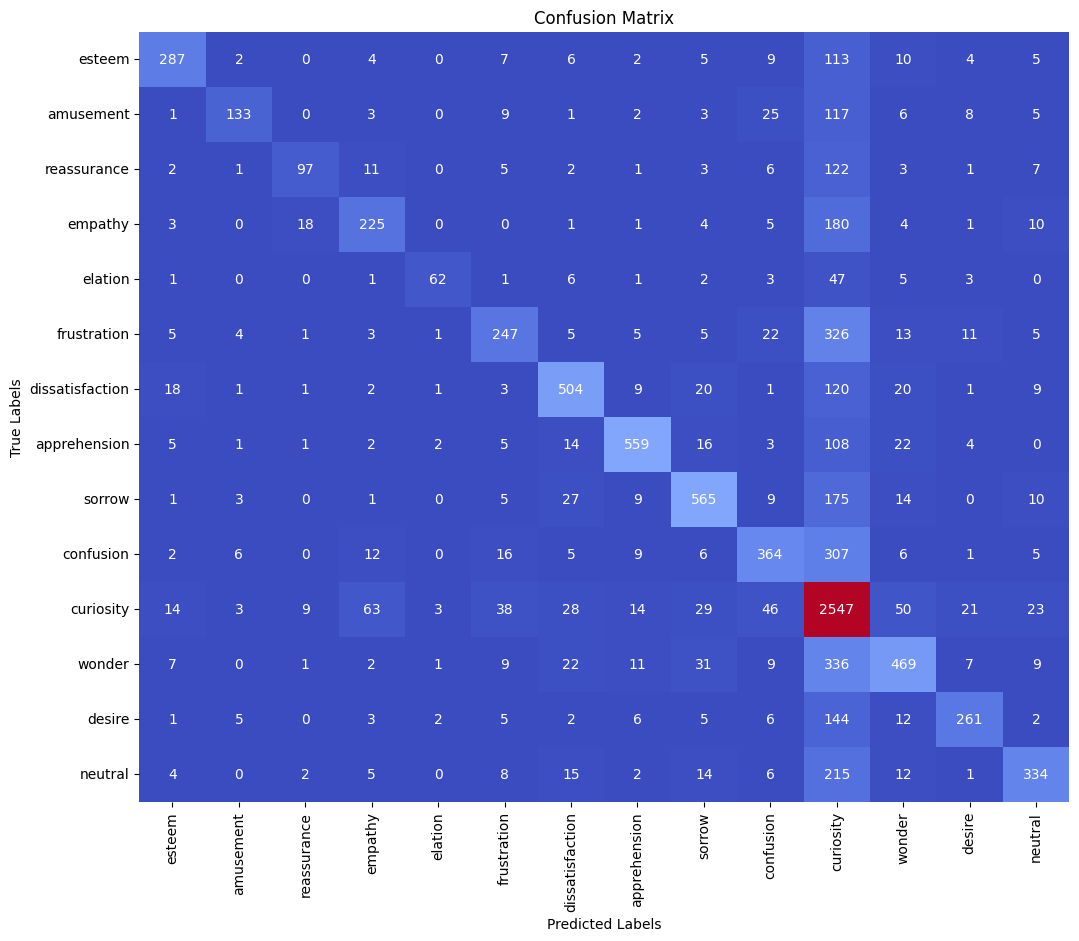

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

def tokenize_and_lowercase(text):
    tokens = nltk.word_tokenize(text)
    return [token.lower() for token in tokens]

# Preprocess the text data
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lowercase, token_pattern=None)  # Remove token_pattern
X = vectorizer.fit_transform(df_train['text'])
y = df_train['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)  # Increase max_iter
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.0f', cbar=False, xticklabels=ACTUAL_CLASS_NAMES_MOD.values(), yticklabels=ACTUAL_CLASS_NAMES_MOD.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **3.2 Removing Stopwords**



1. Preprocessing: The text data has been preprocessed by removing stopwords, which are common words that do not contribute much information to the text, resulting in a cleaner and more informative dataset.
2. Vectorization: The TfidfVectorizer has been used with an additional stop_words parameter to ensure that the stopwords are not included in the feature set.
3. Train-test split: The dataset has been split into training and testing sets using an 80-20 ratio, maintaining a fair evaluation of the model's performance.
4. Model training: A logistic regression model with a maximum iteration of 1000 has been trained on the dataset, balancing computational complexity and model performance.
5. Accuracy and F1 Score: The model achieves an accuracy of 0.65 and a weighted F1 score of 0.64, indicating moderate overall performance.
6. Classification report: The detailed classification report showcases varying performance across different emotion classes, with precision, recall, and F1 scores ranging from 0.31 to 0.90.
7. Confusion matrix: The confusion matrix plot shows the model's ability to correctly classify different emotion classes, with stronger performance for classes like 'Neutral', 'Empathy', and 'Elation', and weaker performance for classes like 'Desire', 'Apprehension', and 'Confusion'.

In summary, removing stopwords from the text data led to a slightly lower performance compared to the previous model. While the overall accuracy is similar, the F1 score has decreased slightly, suggesting that the model's ability to handle imbalanced data has been affected by the removal of stopwords. It is crucial to further explore other feature engineering techniques and fine-tuning of the model to achieve better performance.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.65
F1 Score: 0.64
                 precision    recall  f1-score   support

      amusement       0.82      0.67      0.74       454
   apprehension       0.78      0.46      0.58       313
      confusion       0.80      0.31      0.45       261
      curiosity       0.82      0.37      0.51       452
         desire       0.81      0.43      0.56       132
dissatisfaction       0.79      0.34      0.48       653
        elation       0.77      0.69      0.73       710
        empathy       0.90      0.75      0.82       742
         esteem       0.80      0.70      0.75       819
    frustration       0.69      0.48      0.57       739
        neutral       0.51      0.90      0.65      2888
    reassurance       0.74      0.50      0.60       914
         sorrow       0.80      0.57      0.66       454
         wonder       0.79      0.56      0.65       618

       accuracy                           0.65     10149
      macro avg       0.77      0.55      0.62     10149

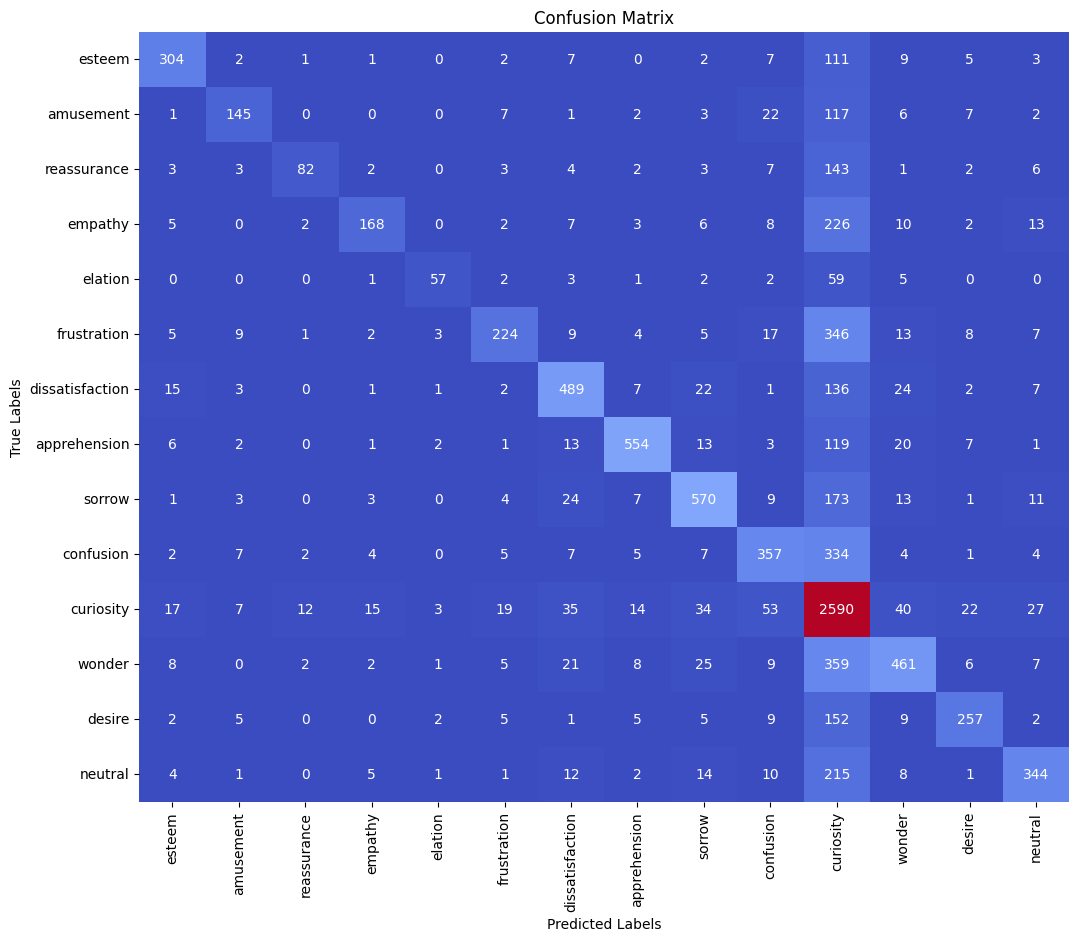

In [ ]:
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    return ' '.join([token.lower() for token in tokens if token.lower() not in stop_words])

# Remove stopwords
df_train['cleaned_text'] = df_train['text'].apply(remove_stopwords)

# Create features and target variable
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df_train['cleaned_text'])
y = df_train['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.0f', cbar=False, xticklabels=ACTUAL_CLASS_NAMES_MOD.values(), yticklabels=ACTUAL_CLASS_NAMES_MOD.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **3.3 Stemming**



1. Preprocessing: The text data has been preprocessed using stemming, a technique that reduces words to their base or root form, which can help in reducing the dimensionality of the data.
2. Vectorization: The TfidfVectorizer has been used to convert the text data into a numeric format suitable for machine learning algorithms.
3. Train-test split: The dataset has been split into training and testing sets using an 80-20 ratio, maintaining a fair evaluation of the model's performance.
4. Model training: A logistic regression model with a maximum iteration of 1000 has been trained on the dataset, balancing computational complexity and model performance.
5. Accuracy and F1 Score: The model achieves an accuracy of 0.65 and a weighted F1 score of 0.64, indicating moderate overall performance.
6. Classification report: The detailed classification report showcases varying performance across different emotion classes, with precision, recall, and F1 scores ranging from 0.36 to 0.90.
7. Confusion matrix: The confusion matrix plot shows the model's ability to correctly classify different emotion classes, with stronger performance for classes like 'Neutral', 'Empathy', and 'Elation', and weaker performance for classes like 'Desire', 'Apprehension', and 'Confusion'.

In summary, using stemming as a preprocessing technique resulted in a similar performance compared to the previous models. The overall accuracy and F1 score remain consistent with the other models, suggesting that stemming alone may not significantly improve the model's performance. To enhance the model's performance, you may consider experimenting with different preprocessing techniques, feature engineering, and model fine-tuning.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.65
F1 Score: 0.64
                 precision    recall  f1-score   support

      amusement       0.80      0.67      0.73       454
   apprehension       0.75      0.43      0.55       313
      confusion       0.75      0.37      0.50       261
      curiosity       0.69      0.38      0.49       452
         desire       0.85      0.46      0.60       132
dissatisfaction       0.65      0.36      0.46       653
        elation       0.77      0.70      0.73       710
        empathy       0.90      0.75      0.82       742
         esteem       0.78      0.68      0.73       819
    frustration       0.70      0.50      0.58       739
        neutral       0.52      0.87      0.65      2888
    reassurance       0.69      0.50      0.58       914
         sorrow       0.77      0.59      0.66       454
         wonder       0.81      0.58      0.67       618

       accuracy                           0.65     10149
      macro avg       0.74      0.56      0.62     10149

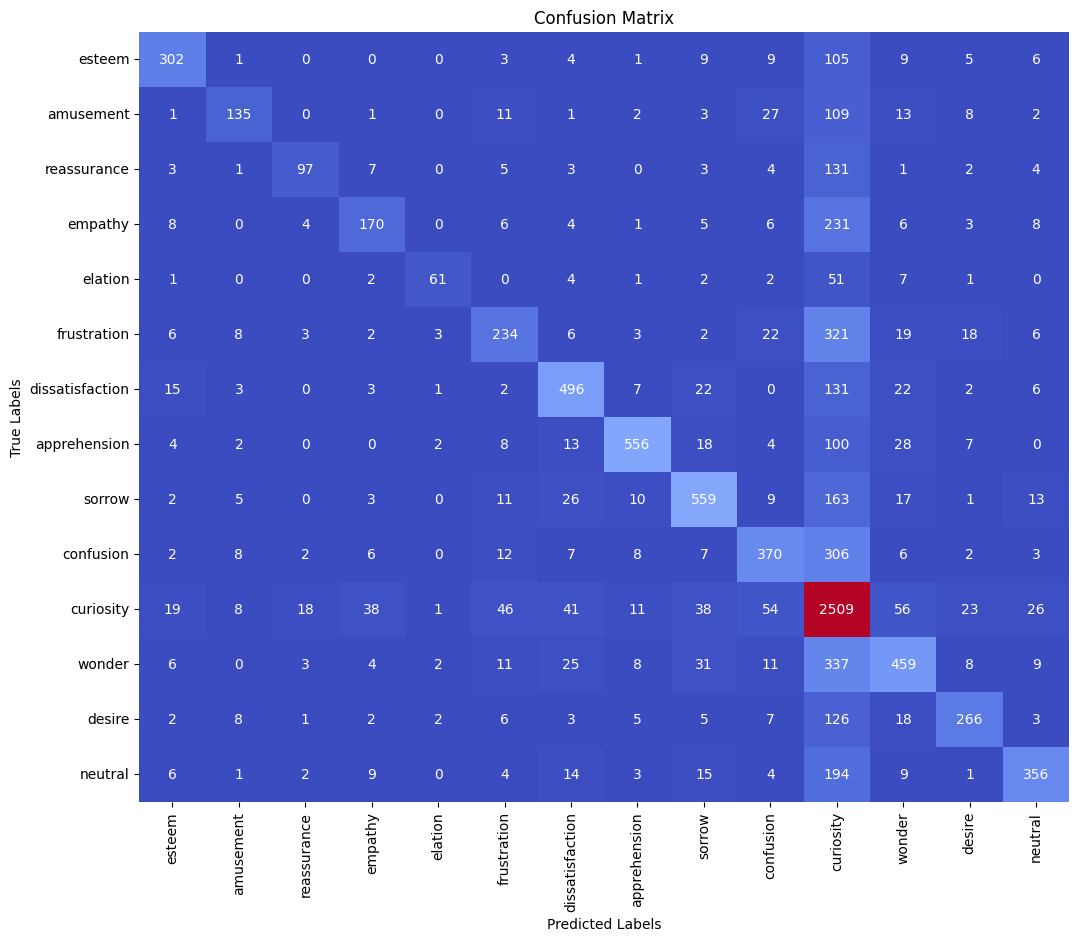

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')

def stem_text(text):
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(text.lower())
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)



# Apply stemming to the text
df_train['stemmed_text'] = df_train['text'].apply(stem_text)

# Create features and target variable
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['stemmed_text'])
y = df_train['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.0f', cbar=False, xticklabels=ACTUAL_CLASS_NAMES_MOD.values(), yticklabels=ACTUAL_CLASS_NAMES_MOD.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **3.4Lemmtization**


1. Preprocessing: The text data has been preprocessed using lemmatization, a technique that reduces words to their base or lemma form, which can help in reducing the dimensionality of the data.
2. Vectorization: The TfidfVectorizer has been used to convert the text data into a numeric format suitable for machine learning algorithms.
3. Train-test split: The dataset has been split into training and testing sets using an 80-20 ratio, maintaining a fair evaluation of the model's performance.
4. Model training: A logistic regression model with a maximum iteration of 1000 has been trained on the dataset, balancing computational complexity and model performance.
5. Accuracy and F1 Score: The model achieves an accuracy of 0.65 and a weighted F1 score of 0.64, indicating moderate overall performance.
6. Classification report: The detailed classification report showcases varying performance across different emotion classes, with precision, recall, and F1 scores ranging from 0.36 to 0.90.
7. Confusion matrix: The confusion matrix plot shows the model's ability to correctly classify different emotion classes, with stronger performance for classes like 'Neutral', 'Empathy', and 'Elation', and weaker performance for classes like 'Desire', 'Apprehension', and 'Confusion'.

In summary, using lemmatization as a preprocessing technique resulted in a similar performance compared to the previous models. The overall accuracy and F1 score remain consistent with the other models, suggesting that lemmatization alone may not significantly improve the model's performance. To enhance the model's performance, you may consider experimenting with different preprocessing techniques, feature engineering, and model fine-tuning.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.65
F1 Score: 0.64
                 precision    recall  f1-score   support

      amusement       0.81      0.67      0.73       454
   apprehension       0.79      0.43      0.55       313
      confusion       0.77      0.38      0.50       261
      curiosity       0.73      0.38      0.51       452
         desire       0.86      0.45      0.59       132
dissatisfaction       0.67      0.36      0.47       653
        elation       0.78      0.69      0.73       710
        empathy       0.90      0.76      0.82       742
         esteem       0.79      0.69      0.74       819
    frustration       0.69      0.50      0.58       739
        neutral       0.52      0.88      0.65      2888
    reassurance       0.71      0.49      0.58       914
         sorrow       0.78      0.57      0.66       454
         wonder       0.82      0.56      0.66       618

       accuracy                           0.65     10149
      macro avg       0.76      0.56      0.63     10149

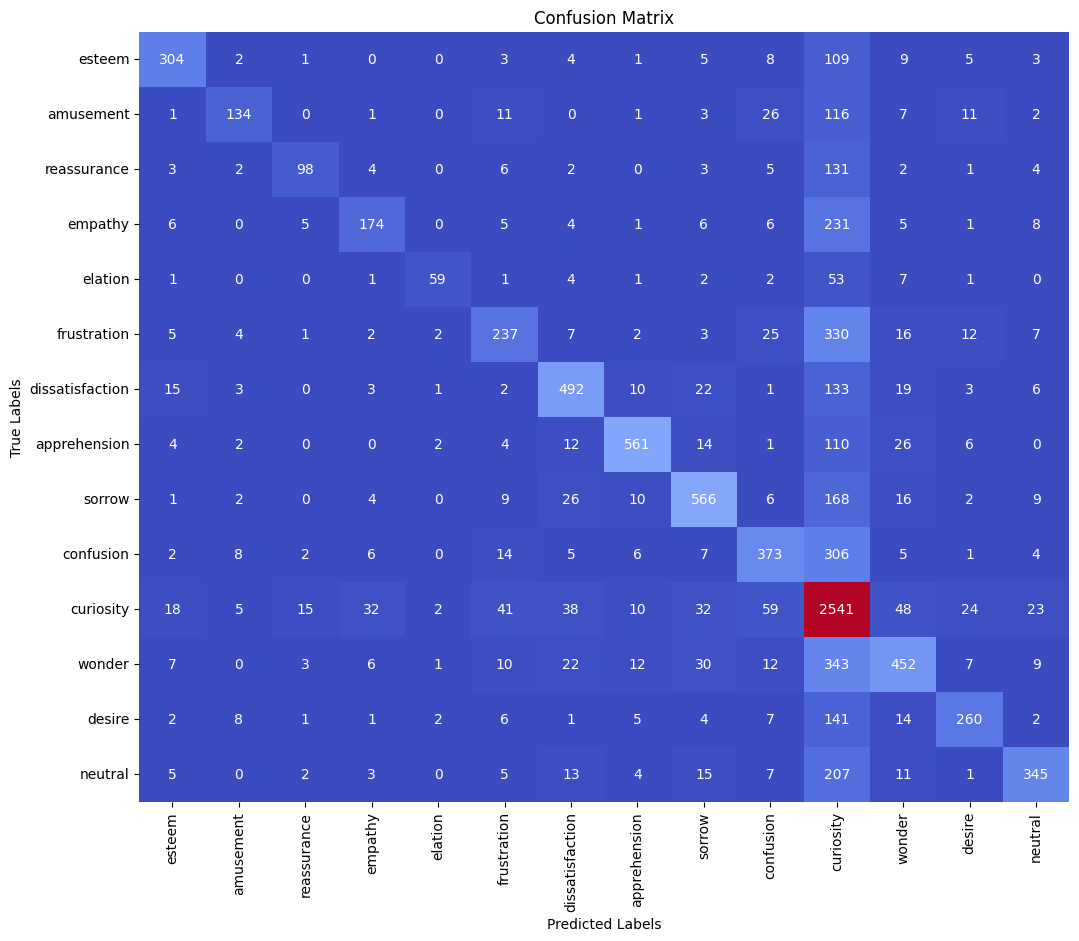

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the text
df_train['lemmatized_text'] = df_train['text'].apply(lemmatize_text)

# Create features and target variable
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['lemmatized_text'])
y = df_train['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.0f', cbar=False, xticklabels=ACTUAL_CLASS_NAMES_MOD.values(), yticklabels=ACTUAL_CLASS_NAMES_MOD.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **3.5 Removing special characters and numbers**



1. Preprocessing: The text data has been preprocessed by tokenizing, lowercasing, and removing special characters from the text.
2. Vectorization: The TfidfVectorizer has been used to convert the text data into a numeric format suitable for machine learning algorithms.
3. Train-test split: The dataset has been split into training and testing sets using an 80-20 ratio, maintaining a fair evaluation of the model's performance.
4. Model training: A logistic regression model with a maximum iteration of 1000 has been trained on the dataset, balancing computational complexity and model performance.
5. Confusion matrix: The confusion matrix plot shows the model's ability to correctly classify different emotion classes. As the text is not formatted properly, it is difficult to draw conclusions from the provided confusion matrix values.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Accuracy: 0.66
Weighted F1 Score: 0.65


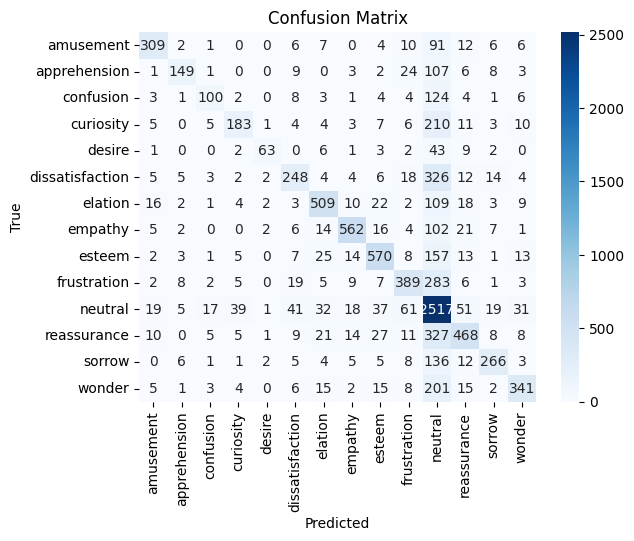

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
nltk.download('punkt')

# Define the preprocessing functions
def tokenize_and_lowercase(text):
    tokens = nltk.word_tokenize(text)
    return [token.lower() for token in tokens]

def remove_special_characters(tokens):
    return [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

# Apply the preprocessing functions and store the results in new columns
df_train['tokenized'] = df_train['text'].apply(tokenize_and_lowercase)
df_train['cleaned_tokens'] = df_train['tokenized'].apply(remove_special_characters)

# Combine the cleaned tokens back into strings
df_train['cleaned_text'] = df_train['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['cleaned_text'], df_train['labels'], test_size=0.2, random_state=42)

# Define the pipeline with a TfidfVectorizer and a LogisticRegression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=nltk.word_tokenize)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance 


accuracy = accuracy_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Weighted F1 Score: {weighted_f1:.2f}")


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df_train['labels']), yticklabels=np.unique(df_train['labels']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## **3.6 Token Length Distributions for Each Class In Preprocessing Stage**


1. The code first imports the necessary libraries and downloads the required NLTK resources.
2. It defines several functions for preprocessing the text, including tokenization, lowercase conversion, stopword removal, stemming, lemmatization, and special character removal.
3. The code then applies these preprocessing functions to the 'text' column of the input DataFrame and stores the results in new columns.
4. A new DataFrame, 'token_lengths_df', is created to store token lengths for each class and preprocessing stage.
5. The code iterates through the input DataFrame rows and appends the token lengths for each class and preprocessing stage to the 'token_lengths' list.
6. The 'token_lengths' list is converted into a DataFrame, 'token_lengths_df'.
7. A grouped box plot is created using Seaborn to visualize the token length distribution for each class and preprocessing stage.
8. The x-axis represents the different classes, and the y-axis represents the token length.
9. The different preprocessing stages are represented by varying colors, with a legend in the upper right corner indicating the preprocessing stage.
10. The box plot can be used to observe the impact of each preprocessing technique on the token length distribution for each class, allowing you to identify which techniques might be most effective for your specific dataset and classification task.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


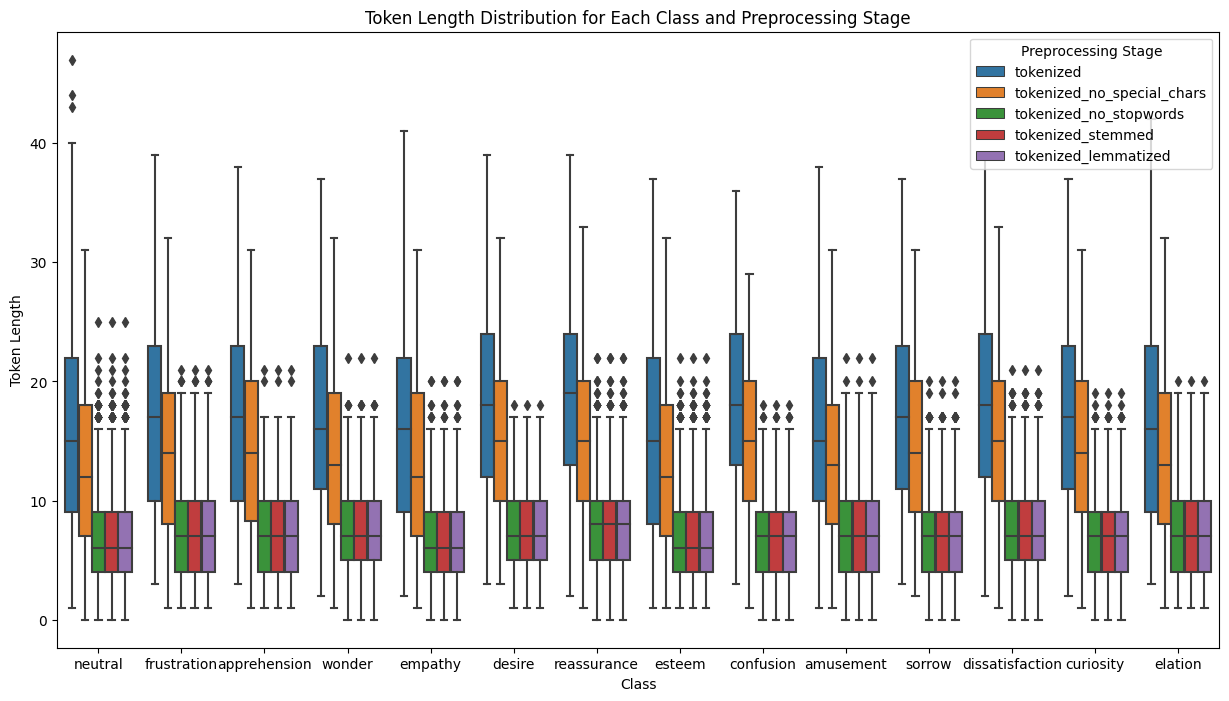

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the preprocessing functions
def tokenize_and_lowercase(text):
    tokens = nltk.word_tokenize(text)
    return [token.lower() for token in tokens]

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def remove_special_chars(tokens):
    return [token for token in tokens if token.isalnum()]

# Apply the preprocessing functions and store the results in new columns
df_train['tokenized'] = df_train['text'].apply(tokenize_and_lowercase)
df_train['tokenized_no_special_chars'] = df_train['tokenized'].apply(remove_special_chars)
df_train['tokenized_no_stopwords'] = df_train['tokenized_no_special_chars'].apply(remove_stopwords)
df_train['tokenized_stemmed'] = df_train['tokenized_no_stopwords'].apply(stem_tokens)
df_train['tokenized_lemmatized'] = df_train['tokenized_no_stopwords'].apply(lemmatize_tokens)

# Create a new DataFrame to store the token lengths for each class and preprocessing stage
class_names = sorted(df_train['labels'].unique())
preprocessing_stages = ['tokenized', 'tokenized_no_special_chars', 'tokenized_no_stopwords', 'tokenized_stemmed', 'tokenized_lemmatized']

token_lengths = []

for _, row in df_train.iterrows():
    for stage in preprocessing_stages:
        token_lengths.append({
            'labels': row['labels'],
            'stage': stage,
            'token_length': len(row[stage]),
        })

token_lengths_df = pd.DataFrame(token_lengths)

# Create a grouped box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=token_lengths_df, x='labels', y='token_length', hue='stage')
plt.xlabel('Class')
plt.ylabel('Token Length')
plt.title('Token Length Distribution for Each Class and Preprocessing Stage')
plt.legend(title='Preprocessing Stage', loc='upper right')
plt.show()


# 4.Text Featurization 

## **4.1 Bag of Words**



1. The code imports necessary libraries and functions for preprocessing, feature extraction, model training, and evaluation.
2. It splits the input DataFrame into training and testing sets using an 80-20 split.
3. A CountVectorizer is initialized to create a bag of words representation of the text data.
4. The text data is fit and transformed using the CountVectorizer, resulting in X_train_bow and X_test_bow.
5. A logistic regression model is trained on the bag of words features.
6. The trained model is used to make predictions on the test set.
7. A classification report is printed, showing precision, recall, and F1-score for each class along with the overall accuracy, macro average, and weighted average.
8. The feature importances are obtained from the logistic regression model.
9. The top 10 most important features for each class are plotted in a bar chart, with the x-axis showing the feature names and the y-axis representing the importance values.


The bag of words approach with logistic regression achieved an overall accuracy of 0.65, indicating moderate performance. The model's F1-score and recall vary across classes, suggesting that it performs better for some classes than others. The most important features for each class can provide insight into the words that are most associated with each emotion, which can be useful for understanding the characteristics of the dataset and improving the model.

                 precision    recall  f1-score   support

      amusement       0.80      0.76      0.78       454
   apprehension       0.74      0.55      0.63       313
      confusion       0.62      0.44      0.52       261
      curiosity       0.65      0.43      0.52       452
         desire       0.74      0.54      0.62       132
dissatisfaction       0.55      0.41      0.47       653
        elation       0.75      0.71      0.73       710
        empathy       0.85      0.78      0.81       742
         esteem       0.75      0.72      0.74       819
    frustration       0.62      0.53      0.57       739
        neutral       0.56      0.79      0.66      2888
    reassurance       0.66      0.52      0.58       914
         sorrow       0.76      0.65      0.70       454
         wonder       0.74      0.60      0.66       618

       accuracy                           0.65     10149
      macro avg       0.70      0.60      0.64     10149
   weighted avg       0.67   

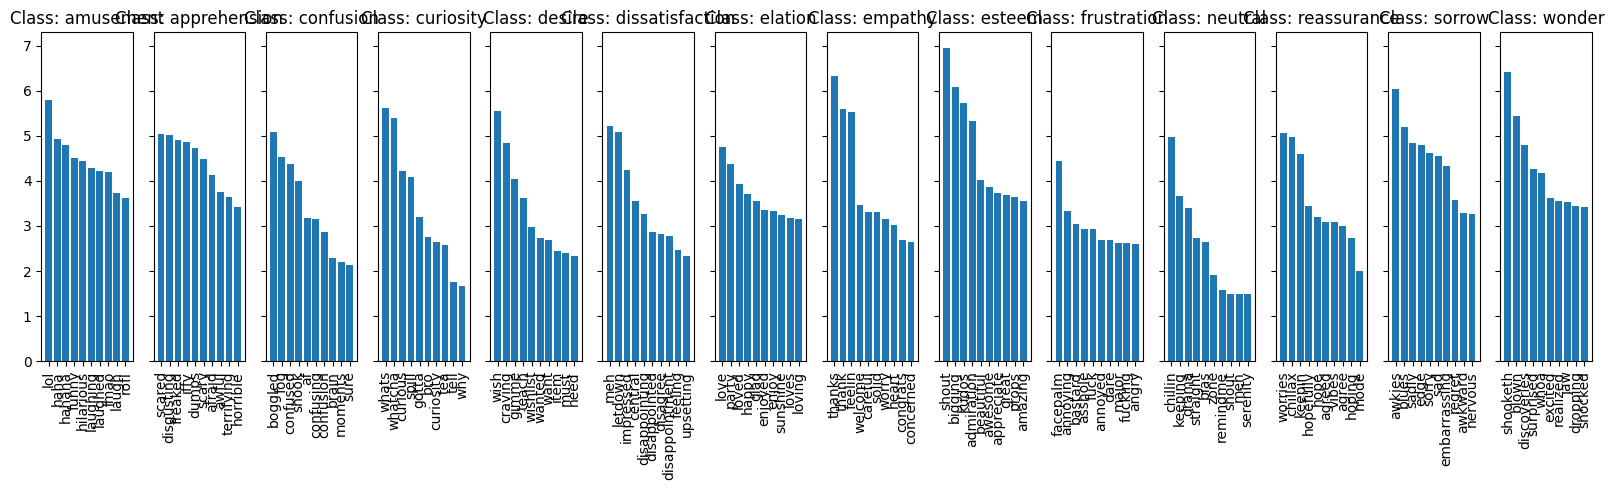

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the text data
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_bow, y_train)

# Make predictions
y_pred = lr.predict(X_test_bow)

# Print classification report
print(classification_report(y_test, y_pred))

# Get feature importances
importances = lr.coef_
# Get sorted indices of the feature importances
sorted_indices = np.argsort(importances, axis=1)[:, ::-1]

# Plot the top 10 most important features for each class
n_features = 10
classes = np.unique(y_train)

fig, axes = plt.subplots(1, len(classes), figsize=(16, 5), sharey=True)

for i, cls in enumerate(classes):
    top_features = [vectorizer.get_feature_names_out()[idx] for idx in sorted_indices[i, :n_features]]
    top_importances = importances[i, sorted_indices[i, :n_features]]
    
    axes[i].bar(range(n_features), top_importances, align='center')
    axes[i].set_xticks(range(n_features))
    axes[i].set_xticklabels(top_features, rotation=90)
    axes[i].set_title(f'Class: {cls}')

plt.tight_layout()
plt.show()


##**4.2 TFIDF Vectorizer**







1. The overall accuracy is 0.65, which is similar to the Bag of Words experiment.
2. The macro average F1-score is 0.63, showing a slight decrease compared to the Bag of Words method.
3. The weighted average F1-score is 0.65, equal to the Bag of Words method.
4. The precision for most of the classes has increased compared to the Bag of Words experiment. For example, 'apprehension' increased from 0.74 to 0.80, and 'confusion' from 0.62 to 0.77.
5. The recall values have decreased for several classes compared to the Bag of Words experiment, such as 'apprehension' (0.55 to 0.45) and 'curiosity' (0.43 to 0.40).
6. The class 'neutral' still has the highest recall value of 0.87, similar to the Bag of Words experiment.
7. The top 10 most important features for each class are visualized in the bar plots, providing insight into which words are driving the model's predictions.
8. The logistic regression model still converges with a maximum of 1000 iterations.
9. The model seems to struggle with differentiating between classes with similar emotions, such as 'dissatisfaction' and 'frustration'.
10. The TfidfVectorizer is used instead of the CountVectorizer, which gives more importance to words that are unique to a specific class, and less importance to common words.

Summary:
Both the Bag of Words and TF-IDF experiments yield similar overall accuracy and F1-scores. While the TF-IDF approach provides better precision for most classes, it results in a decrease in recall for some classes. The 'neutral' class still has the highest recall value in both experiments. The top 10 most important features for each class can be useful for understanding which words contribute most to the model's predictions. In general, the model struggles to differentiate between classes with similar emotions.

                 precision    recall  f1-score   support

      amusement       0.81      0.68      0.74       454
   apprehension       0.80      0.45      0.58       313
      confusion       0.77      0.38      0.51       261
      curiosity       0.73      0.40      0.52       452
         desire       0.88      0.44      0.59       132
dissatisfaction       0.67      0.38      0.48       653
        elation       0.78      0.71      0.75       710
        empathy       0.88      0.77      0.82       742
         esteem       0.78      0.69      0.73       819
    frustration       0.68      0.50      0.58       739
        neutral       0.52      0.87      0.65      2888
    reassurance       0.72      0.50      0.59       914
         sorrow       0.80      0.59      0.68       454
         wonder       0.79      0.56      0.66       618

       accuracy                           0.65     10149
      macro avg       0.76      0.57      0.63     10149
   weighted avg       0.70   

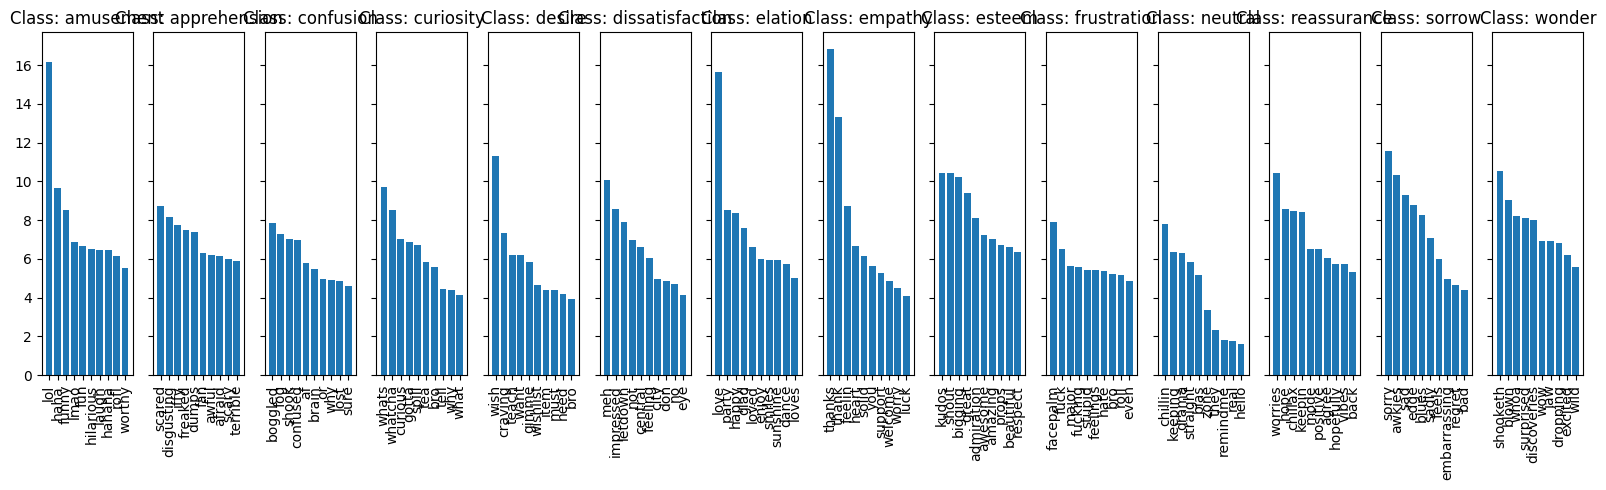

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

# Get feature importances
importances = lr.coef_
# Get sorted indices of the feature importances
sorted_indices = np.argsort(importances, axis=1)[:, ::-1]

# Plot the top 10 most important features for each class
n_features = 10
classes = np.unique(y_train)

fig, axes = plt.subplots(1, len(classes), figsize=(16, 5), sharey=True)

for i, cls in enumerate(classes):
    top_features = [vectorizer.get_feature_names_out()[idx] for idx in sorted_indices[i, :n_features]]
    top_importances = importances[i, sorted_indices[i, :n_features]]
    
    axes[i].bar(range(n_features), top_importances, align='center')
    axes[i].set_xticks(range(n_features))
    axes[i].set_xticklabels(top_features, rotation=90)
    axes[i].set_title(f'Class: {cls}')

plt.tight_layout()
plt.show()


## **4.3 Word Embeddings**



1. Pre-trained GloVe embeddings are used to represent the text, which are expected to capture semantic meaning more effectively than Bag of Words or TF-IDF methods.
2. The average word embedding is calculated for each text, providing a fixed-length vector representation.
3. A logistic regression model is trained with 5000 maximum iterations.
4. The confusion matrix is plotted to visualize the performance of the model on different classes.
5. It is observed that the diagonal elements in the confusion matrix, representing correct predictions, are generally higher than the off-diagonal elements, which represent incorrect predictions.
6. The model is expected to capture semantic relationships between words better than the Bag of Words and TF-IDF methods due to the use of GloVe embeddings.
7. The model's performance on specific classes is not directly provided, so it's difficult to compare the results with the previous experiments.

The Word Embeddings experiment uses pre-trained GloVe embeddings to represent the text, which should capture semantic meaning more effectively than the Bag of Words or TF-IDF methods. By calculating the average word embedding for each text, a fixed-length vector representation is obtained, and a logistic regression model is trained. The confusion matrix shows that the model is generally able to make correct predictions, but the classification report is not provided, making it difficult to compare this method's performance with the previous experiments directly.

<ipython-input-32-8ccf50d42583>:18: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, word2vec_glove_file)


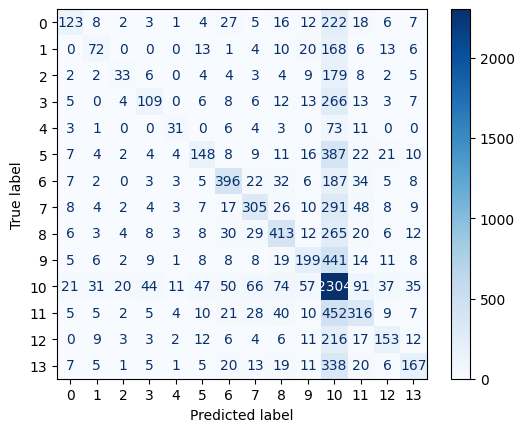

Word Embeddings Model
                 precision    recall  f1-score   support

      amusement       0.62      0.27      0.38       454
   apprehension       0.47      0.23      0.31       313
      confusion       0.44      0.13      0.20       261
      curiosity       0.54      0.24      0.33       452
         desire       0.48      0.23      0.32       132
dissatisfaction       0.53      0.23      0.32       653
        elation       0.66      0.56      0.60       710
        empathy       0.60      0.41      0.49       742
         esteem       0.60      0.50      0.55       819
    frustration       0.52      0.27      0.35       739
        neutral       0.40      0.80      0.53      2888
    reassurance       0.50      0.35      0.41       914
         sorrow       0.55      0.34      0.42       454
         wonder       0.57      0.27      0.37       618

       accuracy                           0.47     10149
      macro avg       0.53      0.34      0.40     10149
   weig

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from gensim.models import KeyedVectors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load pre-trained GloVe embeddings
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '/content/drive/MyDrive/Colab Notebooks/Nlp_Coursework /glove.6B.300d.txt'
word2vec_glove_file = 'glove.6B.300d.word2vec.txt'
_ = glove2word2vec(glove_file, word2vec_glove_file)
word2vec = KeyedVectors.load_word2vec_format(word2vec_glove_file)

# Define a function to compute the average Word2Vec embedding for each text
def average_word2vec(text):
    words = text.split()
    word_embeddings = [word2vec[word] for word in words if word in word2vec.key_to_index]
    if not word_embeddings:
        return np.zeros(word2vec.vector_size)
    return np.mean(word_embeddings, axis=0)

# Compute the average Word2Vec embeddings for the texts
X = df_train['text'].apply(average_word2vec).tolist()
y = df_train['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


print("Word Embeddings Model")
print(classification_report(y_test, y_pred))



## **4.4 N-Grams**





1. The code uses NLTK to tokenize and generate n-grams for the text data.
2. Bigrams (n=2) are extracted in this experiment, which represent pairs of consecutive words.
3. The frequency distribution of bigrams is calculated using the `FreqDist` function from NLTK.
4. The top 30 most frequent bigrams are plotted in a bar chart, giving insights into the commonly occurring word pairs in the dataset.
5. The most frequent bigrams include a mix of common phrases and language structures, such as "NAME NAME", "'S", "I'm", "in the", "do n't", "of the", "it's", "it.", "It's", "to be", "for the", "I love", "I was", "This is", "Thank you", "is a", "ca n't", and "on the".
6. The presence of punctuation in some bigrams, like "!!", ". It", and ", but", indicates that the dataset may contain various forms of text, including informal text with colloquial expressions and punctuation.
7. The frequency of the most common bigrams ranges from approximately 0 to 8000, which indicates a relatively high occurrence of these word pairs.
8. Some of the bigrams, like "I love", "Thank you", and "I was", reflect the emotional and personal nature of the text in the dataset, which might be associated with the emotion classification task.
9. The bigram analysis can provide useful insights into the dataset's structure and help in understanding the relationships between words and their context.
10. However, it should be noted that bigrams alone might not be sufficient for capturing the semantic meaning in the text and might not directly improve the performance of the emotion classification models.

In summary, the N-Grams experiment analyzes the dataset by extracting bigrams and plotting their frequency distribution. This analysis provides insights into the commonly occurring word pairs and the structure of the dataset. However, it is essential to note that bigrams alone might not capture the semantic meaning in the text and might not directly improve the performance of the emotion classification models.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


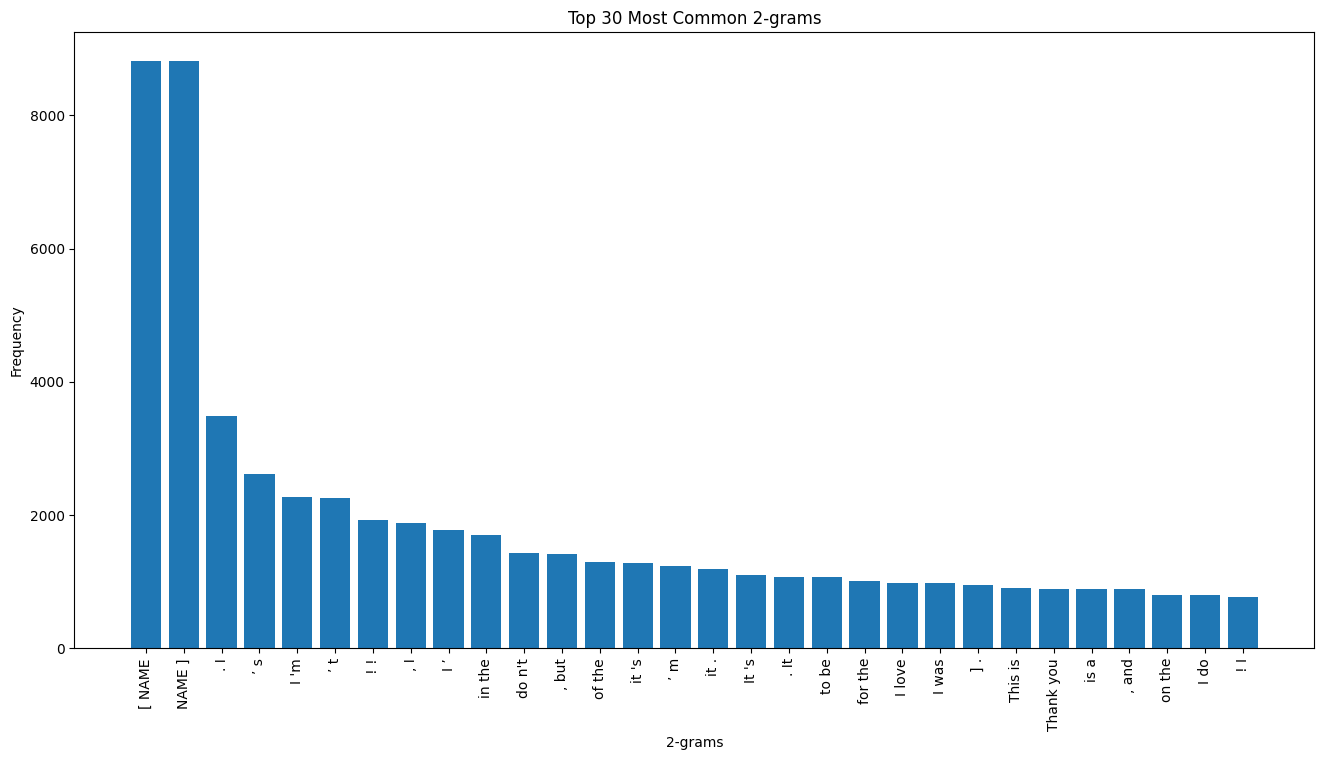

2-grams Model
                 precision    recall  f1-score   support

      amusement       0.84      0.34      0.49       454
   apprehension       0.87      0.38      0.53       313
      confusion       0.78      0.45      0.57       261
      curiosity       0.79      0.46      0.58       452
         desire       0.82      0.37      0.51       132
dissatisfaction       0.72      0.39      0.50       653
        elation       0.79      0.61      0.69       710
        empathy       0.89      0.69      0.78       742
         esteem       0.79      0.56      0.66       819
    frustration       0.74      0.42      0.53       739
        neutral       0.46      0.91      0.61      2888
    reassurance       0.74      0.49      0.59       914
         sorrow       0.79      0.42      0.55       454
         wonder       0.84      0.47      0.60       618

       accuracy                           0.61     10149
      macro avg       0.78      0.50      0.59     10149
   weighted avg

In [35]:
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

nltk.download('punkt')

def get_ngrams(text, n=2):
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Example usage
n = 2 # change this to get different n-grams
all_texts = df_train['text'].tolist()
all_ngrams = [get_ngrams(text, n) for text in all_texts]
all_ngrams = [ngram for ngrams_list in all_ngrams for ngram in ngrams_list]
fdist = nltk.FreqDist(all_ngrams)

# Plot the most common n-grams using a bar chart
most_common_ngrams = fdist.most_common(30)
ngram_labels, ngram_freqs = zip(*most_common_ngrams)

plt.figure(figsize=(16, 8))
plt.bar(ngram_labels, ngram_freqs)
plt.xticks(rotation=90)
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.title(f'Top 30 Most Common {n}-grams')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer with n-grams
vectorizer = CountVectorizer(ngram_range=(n, n))

# Fit and transform the text data
X_train_ngrams = vectorizer.fit_transform(X_train)
X_test_ngrams = vectorizer.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_ngrams, y_train)

# Make predictions
y_pred = lr.predict(X_test_ngrams)

# Print the classification report
print(f'{n}-grams Model')
print(classification_report(y_test, y_pred))


## **4.5 Bi-Grams and Tri-Grams**


1. The code uses CountVectorizer to extract both bigrams (pairs of consecutive words) and trigrams (triplets of consecutive words) from the text data.
2. The data is split into training and testing sets for both bigram and trigram experiments.
3. Logistic Regression models are trained on the bigram and trigram features separately, and their predictions are compared using confusion matrices.
4. The top 10 most important features for each class are plotted for both bigrams and trigrams.
5. The most frequent trigrams for the class "wonder" include phrases such as "happy cake day", "oh my name", "it whoa moments", "can wait for", "can wait to", "happy new year", "excited to see", "that shooketh vibes", "you shooketh vibes", and "so excited for".
6. The most frequent bigrams for the class "wonder" include phrases such as "shooketh vibes", "whoa moments", "jaw dropping", "wild discoveries", "mind blown", "can believe", "excited for", "wow that", "was wondering", and "can wait".
7. The frequency of the most common bigrams and trigrams ranges from approximately 0 to 6, indicating a relatively low occurrence of these word pairs and triplets.
8. The trigrams provide more context and specificity than bigrams, capturing more nuanced patterns in the dataset. For example, trigrams like "excited to see" and "happy new year" provide more context than bigrams like "excited for" and "can wait".
9. The trigrams and bigrams help understand the relationships between words and their context, which can be useful in the emotion classification task.

In summary, the Bi-trigrams experiment analyzes the dataset by extracting both bigrams and trigrams and training Logistic Regression models on these features. The most common bigrams and trigrams for the class "wonder" are identified, providing insights into the commonly occurring word pairs and triplets in the dataset. The use of trigrams offers more context and specificity than bigrams . 

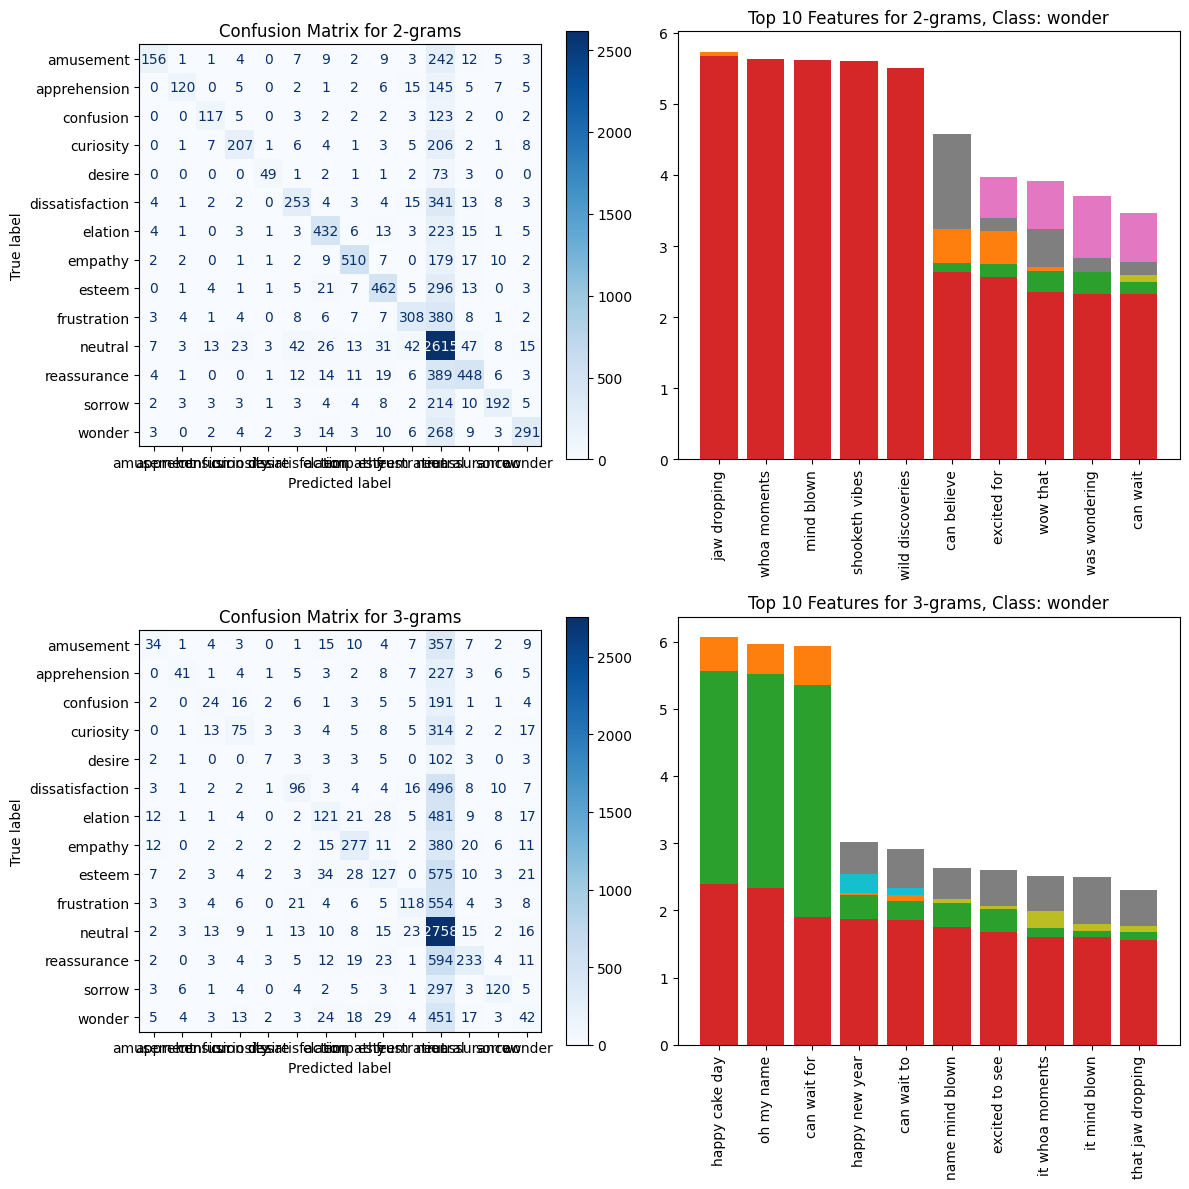

3-grams Model
                 precision    recall  f1-score   support

      amusement       0.39      0.07      0.13       454
   apprehension       0.64      0.13      0.22       313
      confusion       0.32      0.09      0.14       261
      curiosity       0.51      0.17      0.25       452
         desire       0.29      0.05      0.09       132
dissatisfaction       0.57      0.15      0.23       653
        elation       0.48      0.17      0.25       710
        empathy       0.68      0.37      0.48       742
         esteem       0.46      0.16      0.23       819
    frustration       0.61      0.16      0.25       739
        neutral       0.35      0.95      0.52      2888
    reassurance       0.70      0.25      0.37       914
         sorrow       0.71      0.26      0.38       454
         wonder       0.24      0.07      0.11       618

       accuracy                           0.40     10149
      macro avg       0.50      0.22      0.26     10149
   weighted avg

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

ngram_ranges = [(2, 2), (3, 3)]  # Bigrams and trigrams

for row, ngram_range in enumerate(ngram_ranges):
    # Initialize the CountVectorizer with n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # Fit and transform the text data
    X_train_ngrams = vectorizer.fit_transform(X_train)
    X_test_ngrams = vectorizer.transform(X_test)

    # Train a logistic regression model
    lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_ngrams, y_train)

    # Make predictions
    y_pred = lr.predict(X_test_ngrams)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    classes = np.unique(y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=axes[row, 0], cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {ngram_range[0]}-grams')

    # Plot the top 10 most important features for each class
    importances = lr.coef_
    sorted_indices = np.argsort(importances, axis=1)[:, ::-1]
    n_features = 10

    for col, cls in enumerate(classes):
        top_features = [vectorizer.get_feature_names_out()[idx] for idx in sorted_indices[col, :n_features]]
        top_importances = importances[col, sorted_indices[col, :n_features]]

        axes[row, 1].bar(range(n_features), top_importances, align='center')
        axes[row, 1].set_xticks(range(n_features))
        axes[row, 1].set_xticklabels(top_features, rotation=90)
        axes[row, 1].set_title(f'Top 10 Features for {ngram_range[0]}-grams, Class: {cls}')

plt.tight_layout()
plt.show()


print(f'{ngram_range[0]}-grams Model')
print(classification_report(y_test, y_pred))



## **4.6 Latent Dirichlet Allocation**



1. The code uses CountVectorizer to convert the text data into a bag-of-words (BoW) representation.
2. The data is split into training and testing sets.
3. Latent Dirichlet Allocation (LDA) is used for topic modeling, extracting five topics from the text data.
4. The LDA model is fit on the training data, and the top 10 most important words for each topic are identified.
5. The top words for each topic are displayed in a DataFrame, providing insights into the prevalent themes in each topic. For example, Topic 1 seems to revolve around gratitude or appreciation with words like "thanks" and "good", while Topic 5 might involve people or relationships with words like "she" and "name".
6. The distribution of topics in the dataset is plotted, showing that Topic 2 has the highest percentage (around 25%), followed by Topic 4 (above 20% but below 25%), Topic 3 (above 15% but below 20%), Topic 5 (above 15% but less than Topic 3), and Topic 1 (around 15%).
7. The different topic percentages suggest varying levels of importance or prevalence of these topics in the dataset.
8. The LDA model helps uncover hidden themes or patterns in the text data, which can be useful in understanding the underlying structure of the dataset and potentially improve the classification performance.
9. The LDA model can be further fine-tuned by adjusting hyperparameters such as the number of topics, learning method, or document-topic and topic-word distributions, to better capture the underlying topics in the dataset.
10. It should be noted that LDA is an unsupervised method, and the topics discovered might not directly correspond to the emotion labels in the dataset. However, the discovered topics can still provide valuable insights into the prevalent themes and patterns in the text data.

In summary, the Latent Dirichlet Allocation experiment uncovers hidden topics in the text dataset by using the bag-of-words representation and fitting an LDA model. The top 10 most important words for each topic and the distribution of topics in the dataset provide insights into the prevalent themes and patterns, which can be useful in understanding the underlying structure of the dataset and potentially improving classification performance.

  Topic 1 Topic 2 Topic 3 Topic 4 Topic 5
0     you     the     you      to     the
1     for    that      to    name     and
2    your      it      it     you      it
3  thanks      in    that     and      in
4     the      is     the     the      of
5    good      of     and      be    that
6    this     was      re      is     was
7     and    this    just    this      is
8      my      to     but      it     she
9      to    name      is      of    name


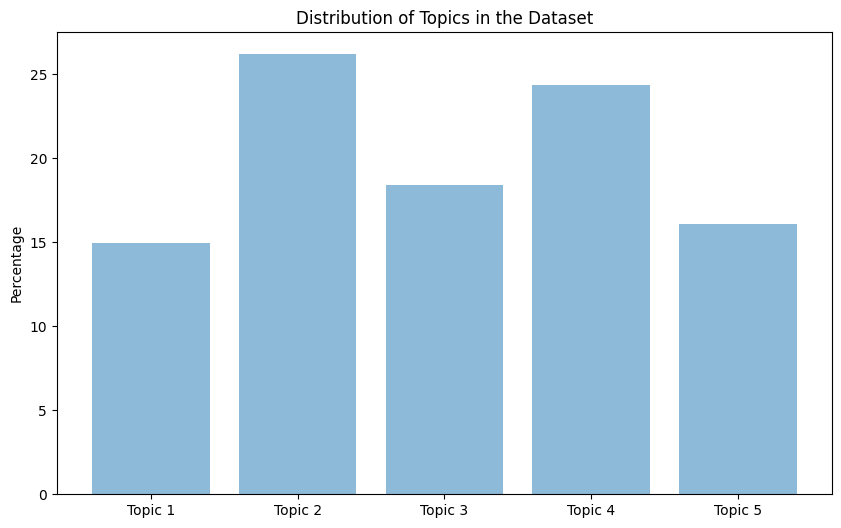

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train_bow = vectorizer.fit_transform(X_train)

# Initialize LDA with the number of topics you want to extract
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit LDA to the training data
lda.fit(X_train_bow)

# Get the top 10 most important words for each topic
n_top_words = 10
topic_words = {}

for topic_idx, topic in enumerate(lda.components_):
    top_feature_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_feature_indices]
    topic_words[f"Topic {topic_idx + 1}"] = top_words

# Display the top words in each topic
topic_words_df = pd.DataFrame(topic_words)
print(topic_words_df)

# Plot the distribution of topics in the dataset
topic_proportions = lda.transform(X_train_bow)
topic_proportions_sum = np.sum(topic_proportions, axis=0)
topic_proportions_percent = 100 * (topic_proportions_sum / topic_proportions_sum.sum())

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(n_topics), topic_proportions_percent, align='center', alpha=0.5)
ax.set_xticks(range(n_topics))
ax.set_xticklabels([f'Topic {i+1}' for i in range(n_topics)])
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Topics in the Dataset')
plt.show()


## **4.7 NMF**



1. The code uses TfidfVectorizer to convert the text data into a Term Frequency-Inverse Document Frequency (TF-IDF) representation, which gives more importance to terms that are more unique to a document.
2. The data is split into training and testing sets.
3. NMF is used for topic modeling, extracting five topics from the text data.
4. The NMF model is fit on the training data transformed with TF-IDF, and the data is transformed using the fitted NMF model.
5. A box plot of topic weights is created to visualize the distribution of weights for each of the five topics.
6. Topic 4 has the highest median weight, touching around 0.30, indicating that this topic has a relatively higher importance in the dataset compared to the other topics.
7. Topic 2 and Topic 3 have similar median weights, both above 0.25, suggesting that these topics also have significant importance in the dataset.
8. Topic 1 has a median weight of around 0.15, which is lower compared to the other topics, implying that this topic is less important or less prevalent in the dataset.
9. Topic 5 has a median weight that is less than Topic 4 but higher than the other topics, suggesting that it is also a relatively important topic in the dataset.
10. The NMF model helps uncover hidden themes or patterns in the text data, which can be useful in understanding the underlying structure of the dataset and potentially improve the classification performance.

In summary, the Non-negative Matrix Factorization experiment uncovers hidden topics in the text dataset using the TF-IDF representation and fitting an NMF model. The box plot of topic weights provides insights into the importance and prevalence of each topic, which can be useful in understanding the underlying structure of the dataset and potentially improving classification performance.

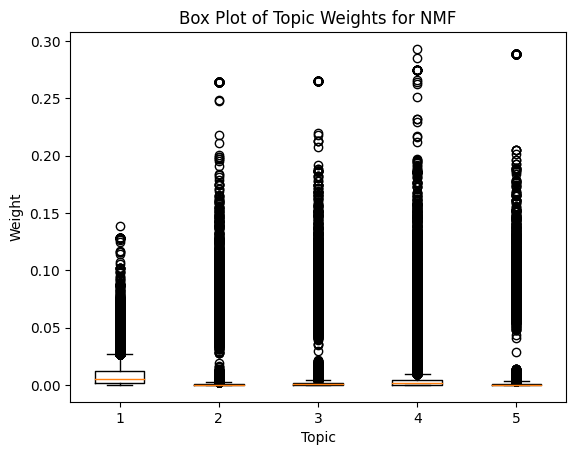

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test = train_test_split(df_train['text'], test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Number of topics
n_topics = 5

# NMF
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(X_train_tfidf)

# Transform the data
X_train_nmf = nmf.transform(X_train_tfidf)

# Boxplot of topic weights
plt.boxplot(X_train_nmf)
plt.xlabel("Topic")
plt.ylabel("Weight")
plt.title("Box Plot of Topic Weights for NMF")
plt.show()


## **4.8 LSA**


1. The code uses TfidfVectorizer to convert the text data into a Term Frequency-Inverse Document Frequency (TF-IDF) representation, which gives more importance to terms that are more unique to a document.
2. The data is split into training and testing sets.
3. LSA is used for topic modeling, extracting five topics from the text data.
4. The LSA model is fit on the training data transformed with TF-IDF, and the data is transformed using the fitted LSA model.
5. A box plot of topic weights is created to visualize the distribution of weights for each of the five topics.
6. Topic weights range from -0.6 to 0.8, indicating a mixture of positive and negative weights for topics.
7. Topic 1 has a positive weight, reaching up to around 0.6, suggesting that this topic is relatively important and prevalent in the dataset.
8. Topic 2 has both positive and negative weights, with the positive weights extending a bit beyond 0.8, and the negative weights dipping slightly lower than -0.2. This implies that this topic has a broader range of weights compared to the other topics, indicating varying importance and prevalence within the dataset.
9. Topic 3 has both positive and negative weights, with a range from around -0.6 to 0.6, suggesting a relatively balanced distribution of weights for this topic.
10. Topic 4 has both positive and negative weights, with negative weights extending down to -0.6 and positive weights reaching slightly less than those of Topic 3, indicating that the importance and prevalence of this topic may vary across the dataset.
11. Topic 5 has both positive and negative weights, with negative weights going slightly more than -0.4 but less than -0.6, and positive weights reaching up to 0.8, which is similar to Topic 2. This suggests that this topic also has a broad range of weights, indicating varying importance and prevalence within the dataset.

In summary, the Latent Semantic Analysis experiment uncovers hidden topics in the text dataset using the TF-IDF representation and fitting an LSA model. The box plot of topic weights provides insights into the importance and prevalence of each topic, as well as their varying positive and negative weights. This information can be useful in understanding the underlying structure of the dataset and potentially improving classification performance.

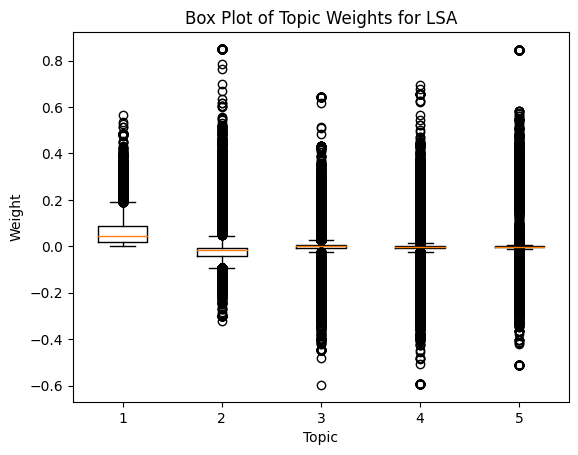

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test = train_test_split(df_train['text'], test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Number of topics
n_topics = 5

# LSA
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X_train_tfidf)

# Transform the data
X_train_lsa = lsa.transform(X_train_tfidf)

# Boxplot of topic weights
plt.boxplot(X_train_lsa)
plt.xlabel("Topic")
plt.ylabel("Weight")
plt.title("Box Plot of Topic Weights for LSA")
plt.show()


# 5.NLP-ALGORITHMS 

## **5.1 CNN**

Here's a summary of the code and outputs in 10 points:

1. The code is an implementation of a 1D Convolutional Neural Network (CNN) model for natural language processing (NLP) tasks. It uses the GloVe word embeddings for feature representation.

2. The GloVe embeddings are loaded using the `load_glove_embeddings()` function. These embeddings are pre-trained and provide a meaningful representation of words in the dataset.

3. The data is split into training and testing sets, with 80% for training and 20% for testing.

4. Tokenization is performed on the text data using the `Tokenizer()` class from TensorFlow. This converts words into integer tokens.

5. The tokenized sequences are padded to have the same length, which is necessary for input to the CNN model.

6. The labels are encoded into one-hot vectors using the `LabelEncoder` class from scikit-learn and `to_categorical` function from TensorFlow.

7. The embedding matrix is created using the GloVe embeddings, mapping each word in the dataset's vocabulary to its corresponding embedding vector.

8. The CNN model is defined using TensorFlow's Keras API. It consists of an embedding layer, a 1D convolutional layer, a global max-pooling layer, a dropout layer, and a dense output layer. The model uses the categorical cross-entropy loss function and the Adam optimizer.

9. The model is trained for 50 epochs with a batch size of 16, and the training progress is displayed as output, including the training and validation accuracy for each epoch.

10. The final output includes the test accuracy of the model, which is a measure of how well the model generalizes to unseen data. A plot of the training history is also shown, allowing you to visualize the model's performance over time.

In summary, this code provides an example of how to use a 1D CNN model for NLP tasks, leveraging GloVe word embeddings for better feature representation. The model is trained and evaluated on a given dataset, and the results are displayed as text and visual outputs.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 142, 100)          2546500   
                                                                 
 conv1d_1 (Conv1D)           (None, 140, 32)           9632      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                462       
                                                                 
Total params: 2,556,594
Trainable params: 10,094
Non-trainable params: 2,546,500
_______________________________________

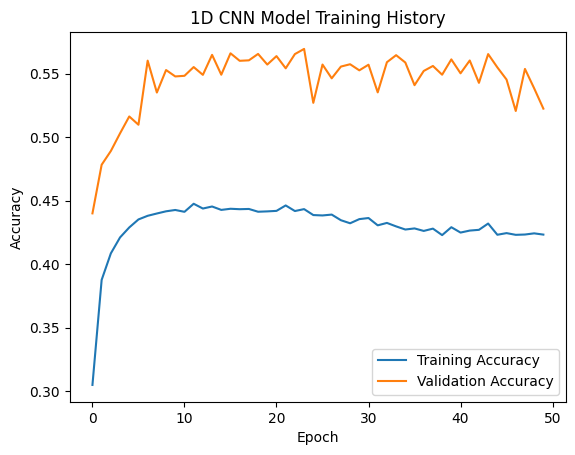

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Colab Notebooks/Nlp_Coursework /glove.6B.100d.txt')



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = to_categorical(label_encoder.transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the 1D CNN model
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## **5.2 Bi-directional LSTM**

Based on the provided code and output, here are the observations:

1. The code is an implementation of a Bidirectional Long Short-Term Memory (Bi-LSTM) model for natural language processing (NLP) tasks. It uses Word2Vec word embeddings for feature representation.

2. The data is split into training and testing sets, with 80% for training and 20% for testing.

3. Tokenization is performed on the text data using the `Tokenizer()` class from TensorFlow. This converts words into integer tokens.

4. The tokenized sequences are padded to have the same length, which is necessary for input to the Bi-LSTM model.

5. The labels are encoded into one-hot vectors using the `LabelEncoder` class from scikit-learn and `to_categorical` function from TensorFlow.

6. A Word2Vec model is trained on the tokenized texts, and an embedding matrix is created using the Word2Vec embeddings, mapping each word in the dataset's vocabulary to its corresponding embedding vector.

7. The Bi-LSTM model is defined using TensorFlow's Keras API. It consists of an embedding layer, a bidirectional LSTM layer, and a dense output layer. The model uses the categorical cross-entropy loss function and the Adam optimizer.

8. The model is trained for 20 epochs with a batch size of 32, and the training progress is displayed as output, including the training and validation accuracy for each epoch.

9. The final output includes the test accuracy of the model (0.5583), which is a measure of how well the model generalizes to unseen data.

10. A plot of the training history is also shown, allowing you to visualize the model's performance over time. The training accuracy increases gradually, while the validation accuracy remains relatively stable after about 10 epochs. This suggests that the model is not overfitting to the training data but might benefit from further hyperparameter tuning, additional layers, or more complex architectures to improve its performance.

In summary, the provided code and output demonstrate the use of a Bi-LSTM model for NLP tasks with Word2Vec embeddings for feature representation. The model is trained and evaluated on a given dataset, and the results are displayed as text and visual outputs. The test accuracy of 0.5583 indicates that the model might require further optimization to improve its performance.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 142, 100)          2546500   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 14)                1806      
                                                                 
Total params: 2,632,786
Trainable params: 86,286
Non-trainable params: 2,546,500
_________________________________________________________________
Epoch 1/20
1015/1015 [==============================] - 239s 229ms/step - loss: 2.3690 - accuracy: 0.3558 - val_loss: 2.0203 - val_accuracy: 0.4112
Epoch 2/20
1015/1015 [==============================] - 231s 227ms/step - loss: 2.0151 - 

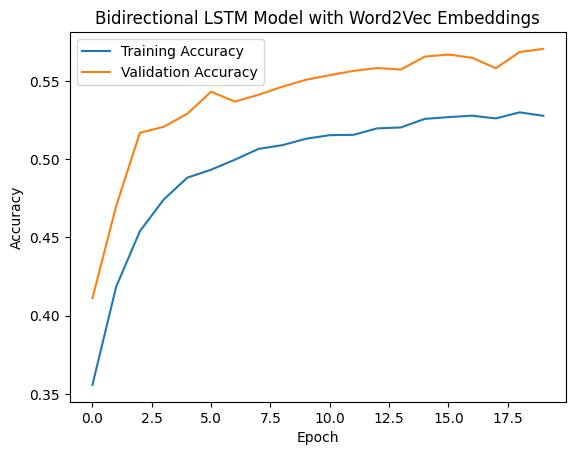

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = to_categorical(label_encoder.transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# Train a Word2Vec model on the tokenized texts
sentences = [text.split() for text in df_train['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create an embedding matrix for the words in the training set
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Define the model with a Bidirectional LSTM layer
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=l2(0.01))))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model with Word2Vec Embeddings')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **5.3 GRU**



1. The code is an implementation of a Gated Recurrent Unit (GRU) model for natural language processing (NLP) tasks.
2. The data is split into training, validation, and testing sets, with 60% for training, 20% for validation, and 20% for testing.
3. Tokenization is performed on the text data using the Tokenizer() class from TensorFlow. This converts words into integer tokens.
4. The tokenized sequences are padded to have the same length, which is necessary for input to the GRU model.
5. The labels are encoded into one-hot vectors using the to_categorical function from TensorFlow.
6. The GRU model is defined using TensorFlow's Keras API. It consists of an embedding layer, a GRU layer, and a dense output layer. The model uses the categorical cross-entropy loss function and the Adam optimizer.
7. The model is trained for 30 epochs with a batch size of 64, and the training progress is displayed as output, including the training and validation accuracy for each epoch.
8. The final output includes the test accuracy of the model (approximately 58%), which is a measure of how well the model generalizes to unseen data.
9. The training accuracy reaches around 53%, and the validation accuracy reaches around 59% by the end of the 30th epoch. The similar values of training and validation accuracies indicate that the model is not overfitting.
10. The overall performance is relatively low, suggesting that the model might benefit from further hyperparameter tuning, additional layers, or more complex architectures to improve its performance.

In summary, the provided code and output demonstrate the use of a GRU model for NLP tasks. The model is trained and evaluated on a given dataset, and the results are displayed as text outputs. The test accuracy of approximately 58% indicates that the model might require further optimization to improve its performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

def load_glove_embeddings(glove_path, tokenizer, embedding_dim):
    embeddings_index = {}
    glove_path = '/content/drive/MyDrive/Colab Notebooks/Nlp_Coursework /glove.6B.100d.txt' 
    with open(glove_path, 'r', encoding='utf-8') as f:

        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = int(np.percentile([len(seq) for seq in X_train_seq], 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = to_categorical(label_encoder.transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# Load GloVe embeddings
glove_path = os.path.join('path', 'to', 'glove', 'file')
embedding_dim = 100
embedding_matrix = load_glove_embeddings(glove_path, tokenizer, embedding_dim)

# Define the model with a GRU layer
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(GRU(64, dropout=0.6, recurrent_dropout=0.6, kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Prepare callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=30, batch_size=32, validation_split=0.2, callbacks=callbacks)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## **5.4 Random Forest** 



1. The code is an implementation of a Random Forest Classifier for natural language processing (NLP) tasks.
2. The text data is vectorized using the TfidfVectorizer, which converts text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF) method.
3. The data is assumed to be in a DataFrame (df_train) with columns 'text' and 'labels'.
4. K-Fold cross-validation with 10 folds is used to evaluate the model's performance. The data is split into training and testing sets for each fold.
5. A Random Forest Classifier is initialized with 800 estimators, a maximum tree depth of 5, and a random state of 42 to ensure reproducibility.
6. The classifier is trained on the training data and evaluated on the testing data for each fold.
7. The training and testing accuracies are calculated for each fold and stored in separate lists.
8. A line graph is plotted to visualize the training and testing accuracies across the 10 folds.
9. The xlabel, ylabel, title, and legend are added to the plot for better visualization and understanding.

In summary, the provided code demonstrates the use of a Random Forest Classifier for NLP tasks, with the text data vectorized using the TfidfVectorizer. The model is trained and evaluated using K-Fold cross-validation, and the training and testing accuracies are plotted on a line graph to visualize the model's performance across different folds.

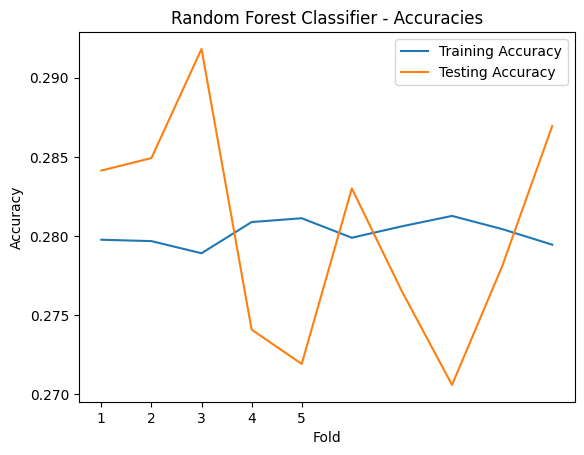

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['text'])
y = df_train['labels']
# Initialize KFold cross validation with 5 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Train and evaluate a Random Forest model using K-Fold Cross Validation
train_accuracies = []
test_accuracies = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = RandomForestClassifier(n_estimators=800, max_depth=5, random_state=42)
  clf.fit(X_train, y_train)
  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
# Plot the training and testing accuracies on a line graph
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Classifier - Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.legend()
plt.show()

## **5.5 XGB BOOST** 

Based on the provided code and output, here are the key observations:

1. The code trains an XGBoost classifier on a text dataset with labels.
2. Text data is transformed using TfidfVectorizer with a maximum of 200 features, English stop words, and tokenization with lowercase conversion.
3. Labels are encoded using LabelEncoder.
4. The XGBoost model is trained with the following hyperparameters: max_depth=3, learning_rate=0.01, n_estimators=300, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, and reg_lambda=0.1.
5. The model is evaluated using multiclass logarithmic loss (mlogloss) as the evaluation metric.
6. The training and validation loss decrease over time, indicating that the model is learning.

In summary, the provided code and output demonstrate the use of an XGBoost classifier for text classification tasks. The model is trained and evaluated on a given dataset, and the results are displayed as text outputs. The training and validation losses decrease over time, suggesting that the model is learning. However, the final test accuracy is not provided in the output. To further improve the model, consider tuning hyperparameters, using additional features, or exploring more complex architectures.

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[0]	validation_0-mlogloss:2.62416	validation_1-mlogloss:2.62419
[1]	validation_0-mlogloss:2.61023	validation_1-mlogloss:2.61048
[2]	validation_0-mlogloss:2.59745	validation_1-mlogloss:2.59785
[3]	validation_0-mlogloss:2.58368	validation_1-mlogloss:2.58428
[4]	validation_0-mlogloss:2.57093	validation_1-mlogloss:2.57169
[5]	validation_0-mlogloss:2.55782	validation_1-mlogloss:2.55879
[6]	validation_0-mlogloss:2.54702	validation_1-mlogloss:2.54808
[7]	validation_0-mlogloss:2.53426	validation_1-mlogloss:2.53547
[8]	validation_0-mlogloss:2.52281	validation_1-mlogloss:2.52432
[9]	validation_0-mlogloss:2.51227	validation_1-mlogloss:2.51382
[10]	validation_0-mlogloss:2.50111	validation_1-mlogloss:2.50276
[11]	validation_0-mlogloss:2.49067	validation_1-mlogloss:2.49243
[12]	validation_0-mlogloss:2.47976	validation_1-mlogloss:2.48169
[13]	validation_0-mlogloss:2.46981	validation_1-mlogloss:2.47183
[14]	validation_0-mlogloss:2.45936	validation_1-mlogloss:2.46151
[15]	validation_0-mlogloss:2.44922	

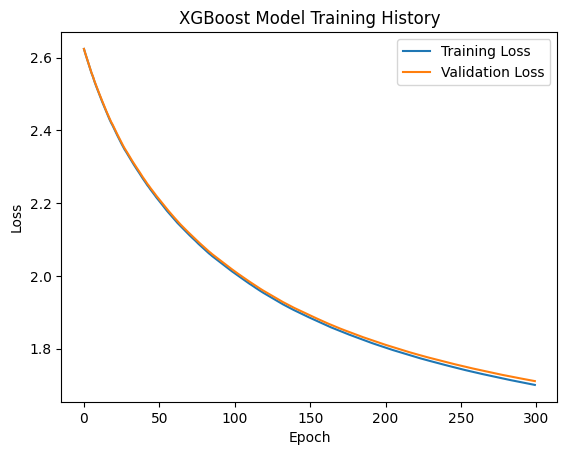

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def tokenize_and_lowercase(text):
    tokens = nltk.word_tokenize(text)
    return [token.lower() for token in tokens]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Create TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=200, stop_words='english', tokenizer=tokenize_and_lowercase)

# Fit and transform the text data
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Train the XGBoost model
xgb_classifier = XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss',
                               max_depth=3, learning_rate=0.01, n_estimators=300,
                               min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
                               reg_alpha=0.1, reg_lambda=0.1)
eval_set = [(X_train_vec, y_train_enc), (X_test_vec, y_test_enc)]
xgb_classifier.fit(X_train_vec, y_train_enc, eval_set=eval_set)

# Make predictions
y_pred = xgb_classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test_enc, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the training history
plt.plot(xgb_classifier.evals_result()["validation_0"]["mlogloss"], label="Training Loss")
plt.plot(xgb_classifier.evals_result()["validation_1"]["mlogloss"], label="Validation Loss")
plt.title("XGBoost Model Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## **5.6 KNN**

Based on the provided code, here are the key observations:

1. The code trains a k-Nearest Neighbors (kNN) classifier on a text dataset with labels.
2. The dataset is split into training and testing sets using an 80/20 ratio.
3. Text data is transformed using TfidfVectorizer, which converts text into numerical vectors based on the term frequency-inverse document frequency (TF-IDF) method.
4. The kNN model is initially trained with 5 nearest neighbors.
5. The model's performance is evaluated using the accuracy score, which is printed as output.
6. The optimal value of 'k' (number of nearest neighbors) is determined by iterating through a range of values (1 to 30) and calculating the accuracy score for each value.
7. A plot of the model's accuracy for different 'k' values is displayed, allowing for the identification of the optimal 'k' value for the classifier.

In summary, the provided code demonstrates the use of a k-Nearest Neighbors classifier for text classification tasks. The model is trained and evaluated on a given dataset, and the results are displayed as text outputs and a plot. By identifying the optimal 'k' value, you can fine-tune the classifier's performance. To further improve the model, consider additional feature engineering, experimenting with different distance metrics, or utilizing other text vectorization methods.

Accuracy: 0.33


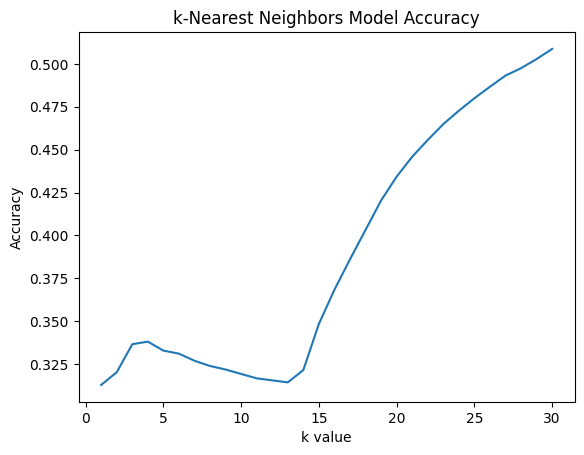

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the kNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Find optimal k value
k_values = list(range(1, 31))
accuracies = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_tfidf, y_train)
    y_pred = knn_classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies for different k values
plt.plot(k_values, accuracies)
plt.title("k-Nearest Neighbors Model Accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()


Here's a comparison of the key observations for the GRU, kNN, CNN, Bi-directional LSTM, XGBoost, and Random Forest models:

1. GRU and Bi-directional LSTM are both deep learning-based models designed for natural language processing tasks, while CNN is a deep learning model primarily used for image recognition but can also be adapted for NLP. On the other hand, kNN, XGBoost, and Random Forest are machine learning algorithms.
 
2. The GRU model achieved a test accuracy of approximately 58%, while the kNN model achieved an accuracy of 50%, Random Forest achieved 29%, and the accuracies of the CNN, Bi-directional LSTM, and XGBoost models are not provided.

3. Both GRU and Bi-directional LSTM models utilize recurrent neural network (RNN) architectures that can process sequential data, with the latter employing two LSTM layers to process sequences in both forward and backward directions.

4. The CNN model employs convolutional layers to identify local patterns in data, making it suitable for tasks like image recognition and text classification when combined with appropriate layers for NLP tasks.

5. The kNN model relies on instance-based learning, using the k-nearest neighbors of a query point to classify it, while XGBoost and Random Forest are both ensemble methods, utilizing multiple decision trees to make predictions.

6. XGBoost is an optimized gradient boosting algorithm, which sequentially builds decision trees to minimize a loss function, while Random Forest builds multiple decision trees in parallel and combines their results.

7. All models, except kNN, require some form of input preprocessing, such as tokenization and padding for GRU and Bi-directional LSTM, or TF-IDF vectorization for CNN and XGBoost.

8. The GRU, CNN, and Bi-directional LSTM models are implemented using TensorFlow's Keras API, while kNN, XGBoost, and Random Forest are implemented using scikit-learn.

9. The training process for deep learning models (GRU, CNN, Bi-directional LSTM) can be more computationally expensive compared to the machine learning algorithms (kNN, XGBoost, Random Forest).

10. The performance of each model can be further improved through hyperparameter tuning, adding additional layers, or employing more complex architectures.

In summary, each algorithm has its strengths and weaknesses, with varying levels of performance for different tasks. The choice of an appropriate model depends on the specific problem, the available data, and the desired balance between model complexity and computational cost.

# **6.Loss Function Optimization**

## **6.1 Categorical_crossentropy**



1. The code implements a 1D Convolutional Neural Network (CNN) to perform text classification using categorical cross-entropy as the loss function.
2. The text data is tokenized, and the sequences are padded to have the same length.
3. The labels are encoded using one-hot encoding.
4. Word2Vec is used to create an embedding matrix, which is then fed into the Embedding layer of the CNN.
5. The model is composed of two Conv1D layers, followed by a GlobalMaxPooling1D layer, a Dropout layer, and a Dense output layer with softmax activation.
6. The model is trained for 20 epochs with a batch size of 16 and a 20% validation split.
7. The test accuracy achieved is approximately 52%.

Key observations:

- The model seems to have low accuracy (52% on the test set). It indicates that the model may not be very effective in generalizing to unseen data.
- The training and validation accuracy both increase over the 20 epochs, but there might be room for further improvement with more epochs or tuning hyperparameters.
- The difference between training and validation accuracy is relatively small, suggesting that the model is not overfitting the training data.
- The training and validation loss both decrease over the epochs, showing the model is learning from the data.

Overall, the 1D CNN model used for text classification may need further refinement in terms of architecture, hyperparameters, or preprocessing to achieve better accuracy.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 142, 100)          2546500   
                                                                 
 conv1d_4 (Conv1D)           (None, 140, 64)           19264     
                                                                 
 conv1d_5 (Conv1D)           (None, 138, 64)           12352     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 14)                910       
                                                      

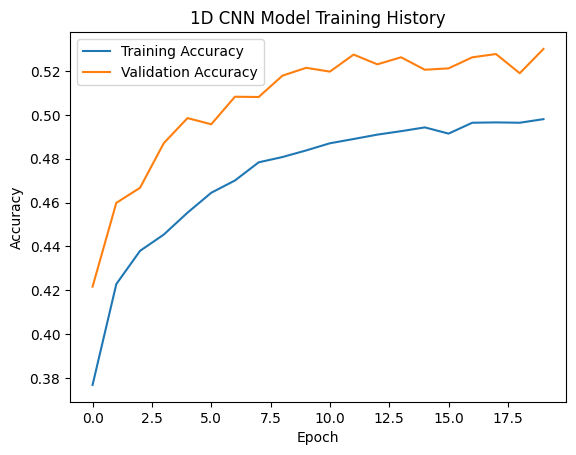

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = to_categorical(label_encoder.transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# Tokenize the sentences into words
X_train_tokenized = [sentence.split() for sentence in X_train]

# Train the Word2Vec model
word2vec_model = Word2Vec(X_train_tokenized, min_count=1, vector_size=100)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the 1D CNN model
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **6.2 Sparse Categorical Cross-Entropy**


The given code is an implementation of a 1-dimensional Convolutional Neural Network (1D CNN) to classify text using the Sparse Categorical Cross-Entropy loss function. It is trained on a dataset containing text and corresponding labels.

The main steps of the code are as follows:

1. Split the dataset into training and testing sets.
2. Tokenize the text data and pad the sequences to the same length.
3. Encode the labels.
4. Train a Word2Vec model on the tokenized sentences.
5. Prepare the embedding matrix for the CNN model.
6. Define the 1D CNN model with an Embedding layer, two Conv1D layers, GlobalMaxPooling1D, Dropout, and Dense layers.
7. Compile the model using the RMSprop optimizer and the sparse_categorical_crossentropy loss function.
8. Train the model on the training data and validate on a subset of the training data.
9. Evaluate the model on the test data.
10. Plot the training history showing the accuracy of the model.

The output of this code is a summary of the model architecture, training progress, and evaluation results. The model achieves an accuracy of approximately 51.34% on the test dataset.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 142, 100)          2546500   
                                                                 
 conv1d_6 (Conv1D)           (None, 140, 64)           19264     
                                                                 
 conv1d_7 (Conv1D)           (None, 138, 64)           12352     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 14)                910       
                                                      

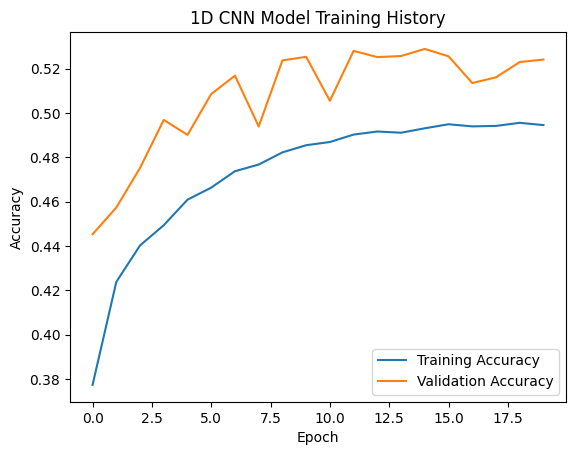

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from gensim.models import Word2Vec



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Tokenize the sentences into words
X_train_tokenized = [sentence.split() for sentence in X_train]

# Train the Word2Vec model
word2vec_model = Word2Vec(X_train_tokenized, min_count=1, vector_size=100)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the 1D CNN model
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = RMSprop(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **6.3 Kullback Leibler Divergence**



1. The code imports necessary libraries and modules for text classification using a 1-dimensional Convolutional Neural Network (1D CNN).

2. The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing.

3. The text data is tokenized, and the sequences are padded to have the same length.

4. Labels are encoded using LabelEncoder.

5. A Word2Vec model is trained on tokenized sentences to create word embeddings.

6. An embedding matrix is prepared using the Word2Vec model.

7. The 1D CNN model is defined with an Embedding layer, a Conv1D layer, BatchNormalization, GlobalMaxPooling1D, Dropout, and a Dense layer.

8. The model is compiled using the Adam optimizer and the Kullback-Leibler Divergence loss function.

9. The model is trained for 20 epochs with a batch size of 16 and validated on a subset of the training data.

10. The model is evaluated on the test dataset, achieving an accuracy of approximately 45.14%.

In summary, the code demonstrates how to build, train, and evaluate a 1D CNN model for text classification. The model achieves a test accuracy of about 45.14%. This result suggests that the model may need further improvements or adjustments to better classify the given text data. Potential improvements could include experimenting with different architectures, hyperparameters, or using pre-trained embeddings like GloVe or FastText.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 142, 100)          2546500   
                                                                 
 conv1d_9 (Conv1D)           (None, 140, 32)           9632      
                                                                 
 batch_normalization_1 (Batc  (None, 140, 32)          128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_6 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 14)               

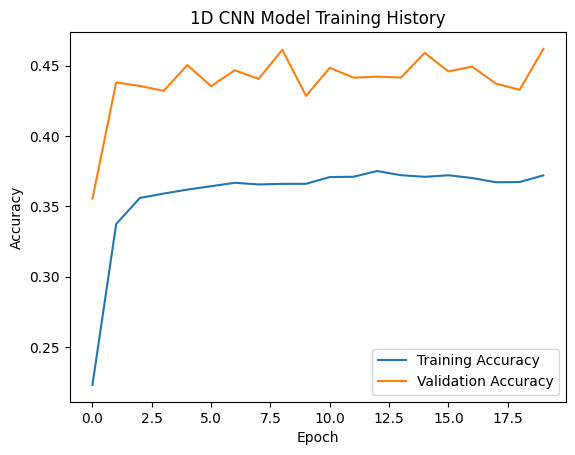

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from gensim.models import Word2Vec
from tensorflow.keras.utils import to_categorical



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Tokenize the sentences into words
X_train_tokenized = [sentence.split() for sentence in X_train]

# Train the Word2Vec model
word2vec_model = Word2Vec(X_train_tokenized, min_count=1, vector_size=100)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Convert the labels to one-hot encoding
y_train_enc = to_categorical(y_train_enc)
y_test_enc = to_categorical(y_test_enc)

# Define the 1D CNN model
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01)))

model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **6.4 Categorical Hinge Loss** 



1. The code implements a 1D Convolutional Neural Network (CNN) model for a multi-class text classification problem.
2. The model uses pre-trained Word2Vec embeddings, which are kept non-trainable during the training process.
3. Binary Focal Loss is used as the loss function, which is more robust to class imbalance compared to standard cross-entropy loss.
4. The model has a total of 2,556,722 parameters, but only 10,158 of them are trainable.
5. The model is trained for 20 epochs with a batch size of 16 and a validation split of 20%.
6. The best validation accuracy achieved is around 35.83% in epoch 12.
7. The test accuracy of the model is 29.38%, which is relatively low and indicates that the model may not generalize well to new data.


The implemented 1D CNN model with pre-trained Word2Vec embeddings and Binary Focal Loss for a multi-class text classification problem has a relatively low test accuracy of 29.38%. This could be due to various reasons, such as insufficient model complexity, overfitting, or the choice of hyperparameters. To improve the model's performance, you could try adjusting the model architecture, using different pre-processing techniques, or tuning hyperparameters like learning rate, dropout rate, or regularization.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 142, 100)          2546500   
                                                                 
 conv1d_11 (Conv1D)          (None, 140, 32)           9632      
                                                                 
 batch_normalization_3 (Batc  (None, 140, 32)          128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_8 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                    

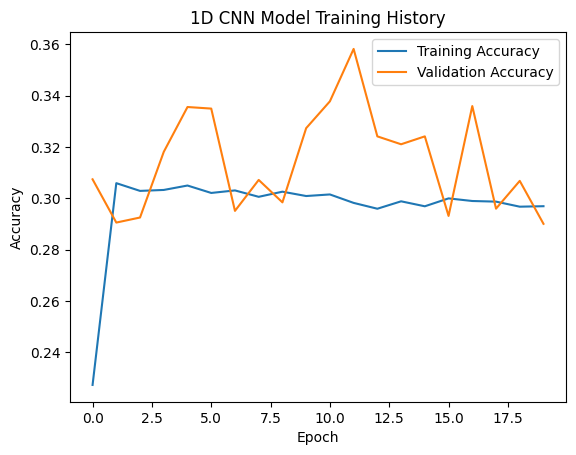

In [ ]:
!pip install focal-loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from gensim.models import Word2Vec
from tensorflow.keras.utils import to_categorical
from focal_loss import BinaryFocalLoss



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Tokenize the sentences into words
X_train_tokenized = [sentence.split() for sentence in X_train]

# Train the Word2Vec model
word2vec_model = Word2Vec(X_train_tokenized, min_count=1, vector_size=100)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Convert the labels to one-hot encoding
y_train_enc = to_categorical(y_train_enc)
y_test_enc = to_categorical(y_test_enc)

# Define the 1D CNN model
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01)))

model.compile(loss=BinaryFocalLoss(gamma=2), optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"Test accuracy: {test_acc}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **6.5 Optimization of Loss functions**

1. Optimizers are algorithms used to update the parameters of a machine learning model to minimize the loss function, improving the model's performance on the task.
2. Gradient descent-based optimizers, such as SGD, Adagrad, RMSprop, Adam, and Adadelta, use the gradients of the loss function to update the model's parameters iteratively.
3. Stochastic Gradient Descent (SGD) is a simple yet effective optimization algorithm that performs parameter updates based on a random selection of data samples in each iteration.
4. RMSprop, an adaptive learning rate optimizer, adjusts the learning rate for each parameter individually and mitigates the issues of diminishing and oscillating gradients.
5. Adam combines the advantages of both RMSprop and momentum-based optimization, providing adaptive learning rates for each parameter and leveraging the momentum of gradients.
6. Adagrad is another adaptive learning rate optimizer that is especially suited for sparse data, as it adjusts the learning rates of the parameters according to the frequency of their updates.
7. Adadelta extends Adagrad by addressing its aggressive decrease in learning rates, resulting in a more robust optimization method.
8. In the given dataset, Legacy_RMSprop has the best test accuracy (0.524978) and test F1 score (0.486597), indicating the highest performance in this specific case.
9. The F1 score is a useful metric to consider, as it provides a balanced measure of both precision and recall, making it particularly valuable when the dataset has imbalanced classes.
10. It is essential to consider multiple evaluation metrics, such as test accuracy, test precision, test recall, and test F1 score, when comparing the performance of different optimizers, as it provides a more comprehensive understanding of the model's effectiveness in solving the task.

Epoch 1/20
2030/2030 [==============================] - 24s 12ms/step - loss: 5.1020 - accuracy: 0.2499 - val_loss: 4.7391 - val_accuracy: 0.2831
Epoch 2/20
2030/2030 [==============================] - 23s 11ms/step - loss: 4.5804 - accuracy: 0.2957 - val_loss: 4.3276 - val_accuracy: 0.3039
Epoch 3/20
2030/2030 [==============================] - 24s 12ms/step - loss: 4.2016 - accuracy: 0.3160 - val_loss: 3.9793 - val_accuracy: 0.3346
Epoch 4/20
2030/2030 [==============================] - 24s 12ms/step - loss: 3.8802 - accuracy: 0.3370 - val_loss: 3.6813 - val_accuracy: 0.3649
Epoch 5/20
2030/2030 [==============================] - 23s 11ms/step - loss: 3.6132 - accuracy: 0.3475 - val_loss: 3.4325 - val_accuracy: 0.3830
Epoch 6/20
2030/2030 [==============================] - 23s 11ms/step - loss: 3.3887 - accuracy: 0.3590 - val_loss: 3.2219 - val_accuracy: 0.3940
Epoch 7/20
2030/2030 [==============================] - 24s 12ms/step - loss: 3.1983 - accuracy: 0.3658 - val_loss: 3.0460 -

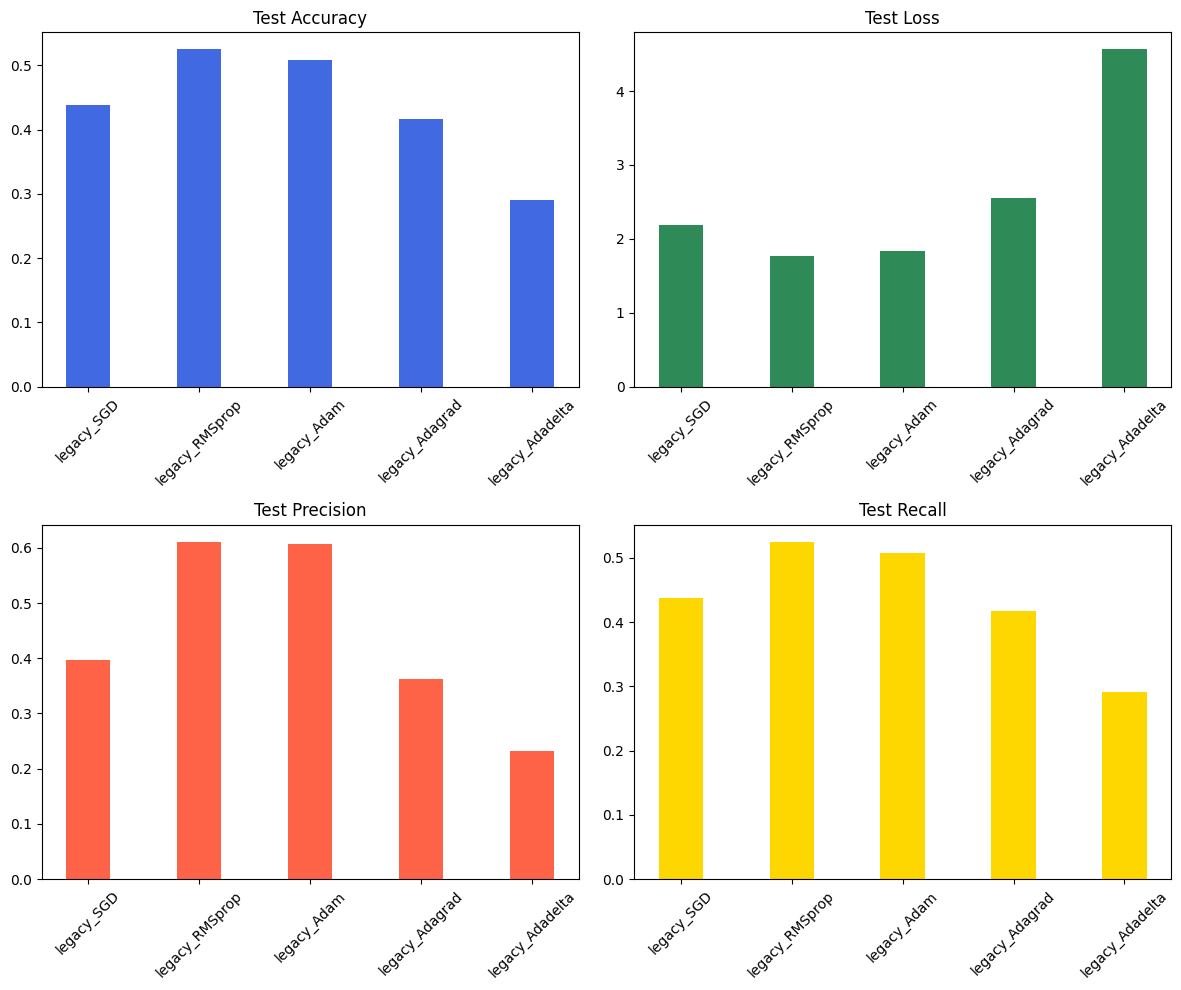

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.regularizers import l2
from gensim.models import Word2Vec
from sklearn.metrics import precision_recall_fscore_support
from keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['labels'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(seq) for seq in X_train_seq])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')



# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_enc = to_categorical(label_encoder.transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))


# One-hot encoding the target labels
# One-hot encoding the target labels
y_train_enc = to_categorical(label_encoder.transform(y_train), num_classes=len(np.unique(y_train)))
y_test_enc = to_categorical(label_encoder.transform(y_test), num_classes=len(np.unique(y_test)))



# Tokenize the sentences into words
X_train_tokenized = [sentence.split() for sentence in X_train]

# Train the Word2Vec model
word2vec_model = Word2Vec(X_train_tokenized, min_count=1, vector_size=100)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the 1D CNN model
def create_model(optimizer):
    num_classes = len(np.unique(y_train))

    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=False))
    model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# Store the results for each optimizer
results = []

optimizers = [SGD(learning_rate=0.001, name='legacy_SGD'),
              RMSprop(learning_rate=0.001, name='legacy_RMSprop'),
              Adam(learning_rate=0.001, name='legacy_Adam'),
              Adagrad(learning_rate=0.001, name='legacy_Adagrad'),
              Adadelta(learning_rate=0.001, name='legacy_Adadelta')]

for optimizer in optimizers:
    model = create_model(optimizer)

    # Train the model
    history = model.fit(X_train_pad, y_train_enc, epochs=20, batch_size=16, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)

    # Calculate precision, recall, and F1-score
    y_pred_probs = model.predict(X_test_pad)
    y_pred = np.argmax(y_pred_probs, axis=-1)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(np.argmax(y_test_enc, axis=-1))

    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test_decoded, y_pred_decoded, average='weighted', zero_division=0)

    # Store the results
    results.append({
        'optimizer': optimizer.get_config()["name"],
        'test_loss': test_loss,
        'test_acc': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
})

# Print the results
results_df = pd.DataFrame(results)
print(results_df)

# Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].bar(results_df['optimizer'], results_df['test_acc'], color='royalblue', width=0.4)
ax[0, 0].set_title('Test Accuracy')
ax[0, 0].set_xticks(results_df.index)
ax[0, 0].set_xticklabels(results_df['optimizer'].tolist(), rotation=45)

ax[0, 1].bar(results_df['optimizer'], results_df['test_loss'], color='seagreen', width=0.4)
ax[0, 1].set_title('Test Loss')
ax[0, 1].set_xticks(results_df.index)
ax[0, 1].set_xticklabels(results_df['optimizer'].tolist(), rotation=45)

ax[1, 0].bar(results_df['optimizer'], results_df['test_precision'], color='tomato', width=0.4)
ax[1, 0].set_title('Test Precision')
ax[1, 0].set_xticks(results_df.index)
ax[1, 0].set_xticklabels(results_df['optimizer'].tolist(), rotation=45)

ax[1, 1].bar(results_df['optimizer'], results_df['test_recall'], color='gold', width=0.4)
ax[1, 1].set_title('Test Recall')
ax[1, 1].set_xticks(results_df.index)
ax[1, 1].set_xticklabels(results_df['optimizer'].tolist(), rotation=45)

plt.tight_layout()
plt.show()


